#**GROUP MEMBERS**

**1) MICHELLE CORDA (229002)**

**2) ABISHA NADAR (229007)**

**3) NAMRATA SINGH (229040)**

# **E - COMMERCE CHURN PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1) Dataset Size**

1.   No. of rows : 5630
2.   No. of Columns : 20
3.   Total no. of elements : 112600










# **2) Domain Selected : E Commerce**

# **3) Domain Prerequiste learning**



**1.  Customer Churn**

Customer churn refers to the natural business cycle of losing and acquiring customers. Every company — no matter the quality of its products or customer service — experiences churn. Generally speaking, the less churn you have, the more customers you keep.

**2. Churn Rate**

Churn rate is the rate at which customers stop doing business with a company over a given period of time.

**3. E - Commerce Churn rate ( in %)**

E - Commerce Churn rate ( in %) can be calculated as Lost Customers ÷ Total Customers at the Start of Time Period. Then, multiply the number by 100.






# **4) About the Dataset**

**Description about the columns**

**CustomerID**  : Unique customer ID

**Churn** : Churn Flag

**Tenure** : Number of years the customer was associated with the business

**PreferredLoginDevice** :  Preferred login device of customer

**CityTier** : The customer belongs to a particular city tier (1/2/3)

**WarehouseToHome** : Distance in between warehouse to home of customer

**PreferredPaymentMode** : Preferred payment method of customer

**Gender** : Gender of customer

**HourSpendOnApp** : Number of hours spend on mobile application or website

**NumberOfDeviceRegistered** :Total number of devices is registered on particular customer

**PreferedOrderCat** : Preferred order category of customer in last month

**SatisfactionScore** : Satisfactory score of customer on service

**MaritalStatus** : Marital status of customer

**NumberOfAddress** : Total number of added address on particular customer

**Complain** : Any complaint has been raised in last month

**OrderAmountHikeFromlastYear** : Percentage increases in order from last year

**CouponUsed** : Total number of coupon has been used in last month

**OrderCount** : Total number of orders has been places in last month

**DaySinceLastOrder** : Day Since last order by customer

**CashbackAmount** : Average cashback in last month

In [ ]:
df = pd.read_csv("E Commerce.csv", header = 0)
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
df.shape

(5630, 20)

In [ ]:
df.size

112600

# **5) The Dashboard visualization and insights is done in the attached Excel Sheet.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

# **6) DATA PREPROCESSING**

**C) Dropping Duplicates**

In [ ]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


There is no duplicate rows in the dataset.

**A) Dealing with Null Values**

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
print("Percentage of missing values in Tenure column ",(df['Tenure'].isnull().sum()/df.shape[0]),"%")
print("Percentage of missing values in HourSpendOnApp  column ",(df['HourSpendOnApp'].isnull().sum()/df.shape[0]),"%")
print("Percentage of missing values in OrderAmountHikeFromlastYear   column ",(df['OrderAmountHikeFromlastYear'].isnull().sum()/df.shape[0]),"%")
print("Percentage of missing values in CouponUsed column ",(df['CouponUsed'].isnull().sum()/df.shape[0]),"%")
print("Percentage of missing values in OrderCount column ",(df['OrderCount'].isnull().sum()/df.shape[0]),"%")
print("Percentage of missing values in DaySinceLastOrder   column ",(df['DaySinceLastOrder'].isnull().sum()/df.shape[0]),"%")



Percentage of missing values in Tenure column  0.04689165186500888 %
Percentage of missing values in HourSpendOnApp  column  0.0452930728241563 %
Percentage of missing values in OrderAmountHikeFromlastYear   column  0.04706927175843695 %
Percentage of missing values in CouponUsed column  0.04547069271758437 %
Percentage of missing values in OrderCount column  0.045825932504440496 %
Percentage of missing values in DaySinceLastOrder   column  0.05452930728241563 %


In [ ]:
df.corr()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217173
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154161
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476577
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055698
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009536
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121469
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137396
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003429
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186802
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000598


**Dealing with Null Values in Tenure**

Since Tenure has high correlation of 0.476577 with CashBackAmount.
We will be dividing CashBackAmount into 4 classes, wrt to each class we wil be creating a dataframe. Now filling the null/ missing values using a random number generator for each new dataframe created on the basis of classes of CashBackAmount.

In [ ]:
tclass = np.linspace(min(df['CashbackAmount']),max(df['CashbackAmount']),5)
tclass

array([  0.  ,  81.25, 162.5 , 243.75, 325.  ])

In [ ]:
tclass_names = ['Between 0 & 81.25','Between 81.25 & 162.5','Between 162.5 & 243.75','Between 243.75 & 325']
df['CategoricalCashbackAmount'] = pd.cut(df['CashbackAmount'],tclass,labels = tclass_names,include_lowest= True)
df['CategoricalCashbackAmount'].head(10)

0    Between 81.25 & 162.5
1    Between 81.25 & 162.5
2    Between 81.25 & 162.5
3    Between 81.25 & 162.5
4    Between 81.25 & 162.5
5    Between 81.25 & 162.5
6    Between 81.25 & 162.5
7    Between 81.25 & 162.5
8    Between 81.25 & 162.5
9    Between 81.25 & 162.5
Name: CategoricalCashbackAmount, dtype: category
Categories (4, object): ['Between 0 & 81.25' < 'Between 81.25 & 162.5' < 'Between 162.5 & 243.75' <
                         'Between 243.75 & 325']

In [ ]:
dfCba1 = df[df['CategoricalCashbackAmount']=="Between 0 & 81.25"]
dfCba1

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount
101,50102,0,10.0,Computer,3,10.0,E wallet,Male,2.0,3,...,2,Married,5,0,17.0,1.0,5.0,8.0,0,Between 0 & 81.25
1026,51027,0,1.0,Mobile Phone,1,33.0,Credit Card,Female,2.0,5,...,5,Married,1,0,21.0,1.0,1.0,0.0,0,Between 0 & 81.25
1176,51177,0,30.0,Computer,3,8.0,Credit Card,Male,2.0,3,...,4,Married,5,0,22.0,10.0,14.0,14.0,0,Between 0 & 81.25
1255,51256,0,8.0,Mobile Phone,3,24.0,Credit Card,Male,3.0,3,...,5,Married,1,0,16.0,0.0,1.0,4.0,0,Between 0 & 81.25
1300,51301,0,6.0,Mobile Phone,1,21.0,Credit Card,Female,3.0,3,...,1,Married,1,1,13.0,5.0,8.0,1.0,12,Between 0 & 81.25
1850,51851,0,0.0,Mobile Phone,1,12.0,Debit Card,Female,3.0,3,...,1,Married,2,1,13.0,0.0,1.0,2.0,56,Between 0 & 81.25
2916,52917,0,11.0,Computer,3,11.0,E wallet,Male,3.0,4,...,2,Married,6,0,18.0,2.0,6.0,9.0,25,Between 0 & 81.25
3841,53842,0,2.0,Mobile Phone,1,34.0,Credit Card,Female,3.0,6,...,5,Married,2,0,22.0,2.0,2.0,1.0,25,Between 0 & 81.25
3991,53992,0,31.0,Computer,3,9.0,Credit Card,Male,3.0,4,...,4,Married,6,0,23.0,11.0,15.0,15.0,25,Between 0 & 81.25
4070,54071,0,9.0,Mobile Phone,3,25.0,Credit Card,Male,4.0,4,...,5,Married,2,0,17.0,1.0,2.0,5.0,25,Between 0 & 81.25


In [ ]:
dfCba1.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CategoricalCashbackAmount      0
dtype: int64

When cashback amount is between 0 and 81.25 there is no null values in any of the columns, even in tenure.

In [ ]:
dfCba2 = df[df['CategoricalCashbackAmount']=="Between 81.25 & 162.5"]
dfCba2

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,160,Between 81.25 & 162.5
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,121,Between 81.25 & 162.5
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120,Between 81.25 & 162.5
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134,Between 81.25 & 162.5
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,130,Between 81.25 & 162.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,55616,0,14.0,Mobile Phone,1,9.0,Debit Card,Male,1.0,5,...,3,Single,4,0,15.0,1.0,3.0,3.0,153,Between 81.25 & 162.5
5617,55618,0,14.0,Phone,1,9.0,Credit Card,Female,4.0,4,...,3,Married,4,0,15.0,1.0,2.0,3.0,145,Between 81.25 & 162.5
5618,55619,0,9.0,Mobile Phone,1,8.0,Debit Card,Female,4.0,6,...,1,Married,3,0,13.0,2.0,2.0,2.0,155,Between 81.25 & 162.5
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,...,3,Single,2,0,19.0,2.0,2.0,1.0,155,Between 81.25 & 162.5


In [ ]:
dfCba2.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder                0
CashbackAmount                   0
CategoricalCashbackAmount        0
dtype: int64

There is 264 missing values in tenure when cashback amount is between 81.25 and 162.5. We will use a random number generator in tenure to fill the missing values in it. We can also clearly observe that in the main dataframe df, there were 264 missing values in tenure and all of those missing values is in this dataframe dfCba2 where CashbackAmount is between 81.25 & 162.5. After dealing with this, we will have no missing values in tenure column in main dataframe df so need to create other dataframes where cashback amount is 'Between 162.5 & 243.75' and 'Between 243.75 & 325' since all the missing values is already dealt now but for concating purpose we need to do that.

In [ ]:
for i, data in dfCba2.iterrows():
  if pd.isnull(data['Tenure']):
        dfCba2.at[i,'Tenure'] = np.random.randint(min(dfCba2['Tenure']),max(dfCba2['Tenure']))

In [ ]:
dfCba2.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder                0
CashbackAmount                   0
CategoricalCashbackAmount        0
dtype: int64

In [ ]:
dfCba3 = df[df['CategoricalCashbackAmount']=="Between 162.5 & 243.75"]

In [ ]:
dfCba4 = df[df['CategoricalCashbackAmount']=="Between 243.75 & 325"]

In [ ]:
df = pd.concat([dfCba1,dfCba2,dfCba3, dfCba4], axis = 0)
df.reset_index(inplace = True)
df

,index,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount
0,101,50102,0,10.0,Computer,3,10.0,E wallet,Male,2.0,...,2,Married,5,0,17.0,1.0,5.0,8.0,0,Between 0 & 81.25
1,1026,51027,0,1.0,Mobile Phone,1,33.0,Credit Card,Female,2.0,...,5,Married,1,0,21.0,1.0,1.0,0.0,0,Between 0 & 81.25
2,1176,51177,0,30.0,Computer,3,8.0,Credit Card,Male,2.0,...,4,Married,5,0,22.0,10.0,14.0,14.0,0,Between 0 & 81.25
3,1255,51256,0,8.0,Mobile Phone,3,24.0,Credit Card,Male,3.0,...,5,Married,1,0,16.0,0.0,1.0,4.0,0,Between 0 & 81.25
4,1300,51301,0,6.0,Mobile Phone,1,21.0,Credit Card,Female,3.0,...,1,Married,1,1,13.0,5.0,8.0,1.0,12,Between 0 & 81.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,5592,55593,0,11.0,Mobile Phone,1,17.0,Debit Card,Female,3.0,...,1,Married,3,1,26.0,NaN,7.0,9.0,262,Between 243.75 & 325
5626,5597,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,...,1,Single,4,0,NaN,2.0,2.0,4.0,319,Between 243.75 & 325
5627,5603,55604,0,16.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,...,3,Married,7,0,NaN,1.0,5.0,15.0,314,Between 243.75 & 325
5628,5605,55606,0,15.0,Mobile Phone,1,35.0,Debit Card,Female,3.0,...,4,Married,2,0,24.0,2.0,2.0,11.0,261,Between 243.75 & 325


In [ ]:
df.isnull().sum()

index                            0
CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
CategoricalCashbackAmount        0
dtype: int64

**Now there is no missing value in Tenure column**

**Dealing with Null Values in WarehousetoHome**

Since WarehousetoHome has high correlation of 0.076630 with the target variable Churn.
We will be creating two dataframe, one where churn = 0 and other where churn = 1, and checking for missing values in this dataframe wrt WarehousetoHome and will be using the random number generator to deal with missing values.

In [ ]:
dfc0 = df[df['Churn']==0]
dfc0

,index,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount
0,101,50102,0,10.0,Computer,3,10.0,E wallet,Male,2.0,...,2,Married,5,0,17.0,1.0,5.0,8.0,0,Between 0 & 81.25
1,1026,51027,0,1.0,Mobile Phone,1,33.0,Credit Card,Female,2.0,...,5,Married,1,0,21.0,1.0,1.0,0.0,0,Between 0 & 81.25
2,1176,51177,0,30.0,Computer,3,8.0,Credit Card,Male,2.0,...,4,Married,5,0,22.0,10.0,14.0,14.0,0,Between 0 & 81.25
3,1255,51256,0,8.0,Mobile Phone,3,24.0,Credit Card,Male,3.0,...,5,Married,1,0,16.0,0.0,1.0,4.0,0,Between 0 & 81.25
4,1300,51301,0,6.0,Mobile Phone,1,21.0,Credit Card,Female,3.0,...,1,Married,1,1,13.0,5.0,8.0,1.0,12,Between 0 & 81.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,5592,55593,0,11.0,Mobile Phone,1,17.0,Debit Card,Female,3.0,...,1,Married,3,1,26.0,NaN,7.0,9.0,262,Between 243.75 & 325
5626,5597,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,...,1,Single,4,0,NaN,2.0,2.0,4.0,319,Between 243.75 & 325
5627,5603,55604,0,16.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,...,3,Married,7,0,NaN,1.0,5.0,15.0,314,Between 243.75 & 325
5628,5605,55606,0,15.0,Mobile Phone,1,35.0,Debit Card,Female,3.0,...,4,Married,2,0,24.0,2.0,2.0,11.0,261,Between 243.75 & 325


In [ ]:
dfc0.isnull().sum()

index                            0
CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                167
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 197
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    251
CouponUsed                     248
OrderCount                     240
DaySinceLastOrder              253
CashbackAmount                   0
CategoricalCashbackAmount        0
dtype: int64

When Churn = 0, there are 167 missing values found in WarehouseToHome column, we will use a random number generator in the WarehouseToHome column to fill the missing values in it.

In [ ]:
for i, data in dfc0.iterrows():
  if pd.isnull(data['WarehouseToHome']):
        dfc0.at[i,'WarehouseToHome'] = np.random.randint(min(dfc0['WarehouseToHome']),max(dfc0['WarehouseToHome']))

In [ ]:
dfc0.isnull().sum()

index                            0
CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 197
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    251
CouponUsed                     248
OrderCount                     240
DaySinceLastOrder              253
CashbackAmount                   0
CategoricalCashbackAmount        0
dtype: int64

When Churn = 0, now there is no missing value in the WarehouseToHome column.Missing values hs been successfully dealt in WarehouseToHome column when Churn = 0.

In [ ]:
dfc1 = df[df['Churn']==1]
dfc1

,index,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount
12,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,2,Single,9,1,11.0,1.0,1.0,5.0,160,Between 81.25 & 162.5
13,1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,...,3,Single,7,1,15.0,0.0,1.0,0.0,121,Between 81.25 & 162.5
14,2,50003,1,47.0,Phone,1,30.0,Debit Card,Male,2.0,...,3,Single,6,1,14.0,0.0,1.0,3.0,120,Between 81.25 & 162.5
15,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,5,Single,8,0,23.0,0.0,1.0,3.0,134,Between 81.25 & 162.5
16,4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,...,5,Single,3,0,11.0,1.0,1.0,3.0,130,Between 81.25 & 162.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,4973,54974,1,3.0,Computer,1,9.0,Debit Card,Male,3.0,...,1,Married,9,0,12.0,11.0,NaN,6.0,247,Between 243.75 & 325
5545,4998,54999,1,6.0,Computer,3,19.0,Debit Card,Male,3.0,...,5,Single,2,1,13.0,NaN,14.0,15.0,263,Between 243.75 & 325
5558,5073,55074,1,9.0,Mobile Phone,3,9.0,E wallet,Female,4.0,...,4,Single,4,1,NaN,2.0,2.0,12.0,313,Between 243.75 & 325
5572,5135,55136,1,19.0,Mobile Phone,3,20.0,E wallet,Male,3.0,...,3,Single,8,1,18.0,NaN,4.0,9.0,262,Between 243.75 & 325


In [ ]:
dfc1.isnull().sum()

index                           0
CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                84
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 58
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    14
CouponUsed                      8
OrderCount                     18
DaySinceLastOrder              54
CashbackAmount                  0
CategoricalCashbackAmount       0
dtype: int64

When Churn = 1, there are 84 missing values found in WarehouseToHome column, we will use a random number generator in the WarehouseToHome column to fill the missing values in it.

In [ ]:
for i, data in dfc1.iterrows():
  if pd.isnull(data['WarehouseToHome']):
        dfc1.at[i,'WarehouseToHome'] = np.random.randint(min(dfc1['WarehouseToHome']),max(dfc1['WarehouseToHome']))

In [ ]:
dfc1.isnull().sum()

index                           0
CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 58
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    14
CouponUsed                      8
OrderCount                     18
DaySinceLastOrder              54
CashbackAmount                  0
CategoricalCashbackAmount       0
dtype: int64

When Churn = 1, now there is no missing value in the WarehouseToHome column.Missing values has been successfully dealt in WarehouseToHome column when Churn = 1. Overall, now there is no missing values in WarehouseToHome column, we need to concat the dataframe dfc0 and dfc1 and then check for null values in WarehouseToHome column to support the statement (Overall, now there is no missing values in WarehouseToHome column)

In [ ]:
df = pd.concat([dfc0,dfc1], axis = 0)
df.reset_index(drop= True,inplace = True)
df.head(5)

,index,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount
0,101,50102,0,10.0,Computer,3,10.0,E wallet,Male,2.0,...,2,Married,5,0,17.0,1.0,5.0,8.0,0,Between 0 & 81.25
1,1026,51027,0,1.0,Mobile Phone,1,33.0,Credit Card,Female,2.0,...,5,Married,1,0,21.0,1.0,1.0,0.0,0,Between 0 & 81.25
2,1176,51177,0,30.0,Computer,3,8.0,Credit Card,Male,2.0,...,4,Married,5,0,22.0,10.0,14.0,14.0,0,Between 0 & 81.25
3,1255,51256,0,8.0,Mobile Phone,3,24.0,Credit Card,Male,3.0,...,5,Married,1,0,16.0,0.0,1.0,4.0,0,Between 0 & 81.25
4,1300,51301,0,6.0,Mobile Phone,1,21.0,Credit Card,Female,3.0,...,1,Married,1,1,13.0,5.0,8.0,1.0,12,Between 0 & 81.25


In [ ]:
df.isnull().sum()

index                            0
CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
CategoricalCashbackAmount        0
dtype: int64

Missing values in WarehouseToHome column is successfully dealt now.

**Dealing with Null Values in HourSpendOnApp**

Since HourSpenOnApp has high correlation of 0.3168 with NumberOfDeviceRegistered, ofcourse it has even higher coorelation with CustomerID, but it doesnt make sense to make use of column CustomerID column to fill the missing values in HourSpendOnApp column .

Let's get an idea about NumberOfDeviceRegistered column, to think of a strategy that can be used to fill missing values in HourSpendOnApp column with respect to NumberOfDeviceRegistered column.

In [ ]:
df['NumberOfDeviceRegistered'].value_counts()

4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64

Strategy that will be used to fill the missing values in HourSpendOnApp would be dividing the main dataframe into 3 dataframe, df1 would be having those rows where NumberOfDeviceRegistered is either 1 or 2,df2 would be having those rows where NumberOfDeviceRegistered is either 3 0r 4,df3 would be having those rows where NumberOfDeviceRegistered is either 5 or 6 and then filling in the missing values with mode of HourSpendOnApp in respective dataframes . Let's define a categoric column in df wrt NumberOfDeviceRegistered, so that it will easy to filter df1,df2,df3 from df

In [ ]:
hclass = np.linspace(min(df['NumberOfDeviceRegistered']),max(df['NumberOfDeviceRegistered']),4)
hclass

array([1.        , 2.66666667, 4.33333333, 6.        ])

In [ ]:
hclass_names = ['NDR_either 1 or 2','NDR_either 3 or 4','NDR_either 5 or 6'] #note :NDR stands for NumberOfDeviceRegistered
df['CategoricalNDR'] = pd.cut(df['NumberOfDeviceRegistered'],hclass,labels = hclass_names,include_lowest= True)
df['CategoricalNDR'].head(10)

0    NDR_either 3 or 4
1    NDR_either 5 or 6
2    NDR_either 3 or 4
3    NDR_either 3 or 4
4    NDR_either 3 or 4
5    NDR_either 3 or 4
6    NDR_either 3 or 4
7    NDR_either 5 or 6
8    NDR_either 3 or 4
9    NDR_either 3 or 4
Name: CategoricalNDR, dtype: category
Categories (3, object): ['NDR_either 1 or 2' < 'NDR_either 3 or 4' < 'NDR_either 5 or 6']

In [ ]:
df1= df[df['CategoricalNDR']=='NDR_either 1 or 2']
df1

,index,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR
34,59,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,...,Married,2,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2
37,68,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,...,Married,5,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2
38,70,50071,0,10.0,Phone,1,27.0,Debit Card,Male,3.0,...,Divorced,2,1,12.0,0.0,1.0,7.0,136,Between 81.25 & 162.5,NDR_either 1 or 2
44,81,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,...,Married,2,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2
66,135,50136,0,5.0,Computer,1,13.0,Debit Card,Male,NaN,...,Divorced,2,0,20.0,0.0,1.0,3.0,128,Between 81.25 & 162.5,NDR_either 1 or 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,5193,55194,1,1.0,Computer,1,8.0,Debit Card,Female,4.0,...,Single,3,0,12.0,2.0,5.0,8.0,199,Between 162.5 & 243.75,NDR_either 1 or 2
5612,3396,53397,1,4.0,Computer,3,31.0,Debit Card,Female,4.0,...,Single,6,1,17.0,2.0,NaN,1.0,257,Between 243.75 & 325,NDR_either 1 or 2
5617,3665,53666,1,19.0,Mobile Phone,3,20.0,E wallet,Male,3.0,...,Single,8,1,18.0,NaN,4.0,9.0,262,Between 243.75 & 325,NDR_either 1 or 2
5623,4866,54867,1,4.0,Computer,3,31.0,Debit Card,Female,4.0,...,Single,6,1,17.0,2.0,NaN,1.0,257,Between 243.75 & 325,NDR_either 1 or 2


In [ ]:
df1.isnull().sum()

index                           0
CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 35
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    15
CouponUsed                     24
OrderCount                     33
DaySinceLastOrder              11
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
dtype: int64

There is 35 missing values in HourSpendOnApp. Let's fill in the missing values with the mode.

In [ ]:
mode1=df1['HourSpendOnApp'].mode()[0]
mode1

3.0

In [ ]:
df1['HourSpendOnApp'].fillna(mode1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df1.isnull().sum()

index                           0
CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    15
CouponUsed                     24
OrderCount                     33
DaySinceLastOrder              11
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
dtype: int64

Now there is no missing values in df1 dataframe wrt HourSpentOnApp

In [ ]:
df2= df[df['CategoricalNDR']=='NDR_either 3 or 4']
df2

,index,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR
0,101,50102,0,10.0,Computer,3,10.0,E wallet,Male,2.0,...,Married,5,0,17.0,1.0,5.0,8.0,0,Between 0 & 81.25,NDR_either 3 or 4
2,1176,51177,0,30.0,Computer,3,8.0,Credit Card,Male,2.0,...,Married,5,0,22.0,10.0,14.0,14.0,0,Between 0 & 81.25,NDR_either 3 or 4
3,1255,51256,0,8.0,Mobile Phone,3,24.0,Credit Card,Male,3.0,...,Married,1,0,16.0,0.0,1.0,4.0,0,Between 0 & 81.25,NDR_either 3 or 4
4,1300,51301,0,6.0,Mobile Phone,1,21.0,Credit Card,Female,3.0,...,Married,1,1,13.0,5.0,8.0,1.0,12,Between 0 & 81.25,NDR_either 3 or 4
5,1850,51851,0,0.0,Mobile Phone,1,12.0,Debit Card,Female,3.0,...,Married,2,1,13.0,0.0,1.0,2.0,56,Between 0 & 81.25,NDR_either 3 or 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,4595,54596,1,1.0,Mobile Phone,1,22.0,Credit Card,Male,3.0,...,Married,9,1,13.0,NaN,8.0,8.0,261,Between 243.75 & 325,NDR_either 3 or 4
5621,4728,54729,1,19.0,Mobile Phone,1,9.0,Credit Card,Male,4.0,...,Married,7,1,14.0,2.0,2.0,5.0,324,Between 243.75 & 325,NDR_either 3 or 4
5622,4755,54756,1,21.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,...,Single,9,1,NaN,8.0,14.0,9.0,317,Between 243.75 & 325,NDR_either 3 or 4
5625,4973,54974,1,3.0,Computer,1,9.0,Debit Card,Male,3.0,...,Married,9,0,12.0,11.0,NaN,6.0,247,Between 243.75 & 325,NDR_either 3 or 4


In [ ]:
df2.isnull().sum()

index                            0
CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 208
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    191
CouponUsed                     201
OrderCount                     164
DaySinceLastOrder              200
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
dtype: int64

There is 208 missing values in HourSpendOnApp. Let's fill in the missing values with the mode.

In [ ]:
mode2=df2['HourSpendOnApp'].mode()[0]
mode2

3.0

In [ ]:
df2['HourSpendOnApp'].fillna(mode2,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df2.isnull().sum()

index                            0
CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    191
CouponUsed                     201
OrderCount                     164
DaySinceLastOrder              200
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
dtype: int64

Now there is no missing values in df2 dataframe wrt HourSpentOnApp

In [ ]:
df3= df[df['CategoricalNDR']=='NDR_either 5 or 6']
df3

,index,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR
1,1026,51027,0,1.0,Mobile Phone,1,33.0,Credit Card,Female,2.0,...,Married,1,0,21.0,1.0,1.0,0.0,0,Between 0 & 81.25,NDR_either 5 or 6
7,3841,53842,0,2.0,Mobile Phone,1,34.0,Credit Card,Female,3.0,...,Married,2,0,22.0,2.0,2.0,1.0,25,Between 0 & 81.25,NDR_either 5 or 6
50,99,50100,0,4.0,Computer,1,6.0,Credit Card,Male,2.0,...,Divorced,1,0,12.0,1.0,1.0,4.0,143,Between 81.25 & 162.5,NDR_either 5 or 6
86,174,50175,0,24.0,Mobile Phone,1,8.0,Credit Card,Male,2.0,...,Married,6,0,18.0,0.0,1.0,2.0,155,Between 81.25 & 162.5,NDR_either 5 or 6
91,183,50184,0,30.0,Computer,1,6.0,Debit Card,Male,2.0,...,Married,3,1,13.0,1.0,1.0,2.0,157,Between 81.25 & 162.5,NDR_either 5 or 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,3603,53604,1,9.0,Mobile Phone,3,9.0,E wallet,Female,4.0,...,Single,4,1,NaN,1.0,2.0,12.0,313,Between 243.75 & 325,NDR_either 5 or 6
5618,3913,53914,1,11.0,Computer,3,16.0,Debit Card,Male,3.0,...,Married,9,0,12.0,2.0,NaN,11.0,254,Between 243.75 & 325,NDR_either 5 or 6
5624,4909,54910,1,16.0,Mobile Phone,3,9.0,E wallet,Female,3.0,...,Married,3,0,16.0,4.0,7.0,10.0,323,Between 243.75 & 325,NDR_either 5 or 6
5627,5073,55074,1,9.0,Mobile Phone,3,9.0,E wallet,Female,4.0,...,Single,4,1,NaN,2.0,2.0,12.0,313,Between 243.75 & 325,NDR_either 5 or 6


In [ ]:
df3.isnull().sum()

index                           0
CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 12
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    59
CouponUsed                     31
OrderCount                     61
DaySinceLastOrder              96
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
dtype: int64

There is 12 missing values in HourSpendOnApp. Let's fill in the missing values with the mode.

In [ ]:
mode3=df3['HourSpendOnApp'].mode()[0]
mode3

3.0

In [ ]:
df3['HourSpendOnApp'].fillna(mode3,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3.isnull().sum()

index                           0
CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    59
CouponUsed                     31
OrderCount                     61
DaySinceLastOrder              96
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
dtype: int64

Now there is no missing values in df3 dataframe wrt HourSpentOnApp


In [ ]:
df = pd.concat([df1,df2,df3], axis = 0)
df.reset_index(drop = True,inplace= True)
df.head(10)

,index,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR
0,59,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,...,Married,2,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2
1,68,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,...,Married,5,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2
2,70,50071,0,10.0,Phone,1,27.0,Debit Card,Male,3.0,...,Divorced,2,1,12.0,0.0,1.0,7.0,136,Between 81.25 & 162.5,NDR_either 1 or 2
3,81,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,...,Married,2,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2
4,135,50136,0,5.0,Computer,1,13.0,Debit Card,Male,3.0,...,Divorced,2,0,20.0,0.0,1.0,3.0,128,Between 81.25 & 162.5,NDR_either 1 or 2
5,142,50143,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,...,Married,2,0,12.0,1.0,1.0,5.0,140,Between 81.25 & 162.5,NDR_either 1 or 2
6,152,50153,0,11.0,Mobile Phone,3,13.0,Credit Card,Female,2.0,...,Married,2,1,24.0,0.0,7.0,7.0,156,Between 81.25 & 162.5,NDR_either 1 or 2
7,173,50174,0,9.0,Computer,1,24.0,Debit Card,Male,2.0,...,Divorced,5,0,18.0,0.0,1.0,0.0,137,Between 81.25 & 162.5,NDR_either 1 or 2
8,177,50178,0,1.0,Mobile Phone,1,22.0,Credit Card,Male,3.0,...,Single,1,0,19.0,0.0,1.0,7.0,157,Between 81.25 & 162.5,NDR_either 1 or 2
9,197,50198,0,5.0,Mobile Phone,1,8.0,Credit Card,Female,3.0,...,Single,8,0,16.0,1.0,1.0,7.0,151,Between 81.25 & 162.5,NDR_either 1 or 2


In [ ]:
df = df.drop(['index'], axis = 1)
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR
0,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,...,Married,2,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2
1,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,2,...,Married,5,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2
2,50071,0,10.0,Phone,1,27.0,Debit Card,Male,3.0,2,...,Divorced,2,1,12.0,0.0,1.0,7.0,136,Between 81.25 & 162.5,NDR_either 1 or 2
3,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,2,...,Married,2,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2
4,50136,0,5.0,Computer,1,13.0,Debit Card,Male,3.0,2,...,Divorced,2,0,20.0,0.0,1.0,3.0,128,Between 81.25 & 162.5,NDR_either 1 or 2


In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
dtype: int64

Missing Values in HourSpendOnApp is successfully dealt.

**Dealing with Null Values in OrderAmountHikeFromlastYear**

Since OrderAmountHikeFromlastYear has high correlation of 0.106843 with HourSpentOnApp , ofcourse it has even higher coorelation with CustomerID, but it doesnt make sense to make use of column CustomerID column to fill the missing values in OrderAmountHikeFromlastYear column .

Let's get an idea about HourSpendOnApp column, to think of a strategy that can be used to fill missing values in OrderAmountHikeFromlastYear column with respect to HourSpendOnApp column.

In [ ]:
df['HourSpendOnApp'].value_counts()

3.0    2942
2.0    1471
4.0    1176
1.0      35
5.0       3
0.0       3
Name: HourSpendOnApp, dtype: int64

Strategy that will be used to fill the missing values in OrderAmountHikeFromlastYear column would be, dividing the main dataframe into 2 dataframe, df1 would be having those rows where HourSpendOnApp is between 0 and 2 ,df2 would be having those rows where HourSpendOnApp is between 3 and 5, and then filling in the missing values with random number generator of OrderAmountHikeFromlastYear wrt each dataframe  . Let's define a categoric column in df wrt HourSpendOnApp, so that it will easy to filter df1,df2 from df

In [ ]:
oclass = np.linspace(min(df['HourSpendOnApp']),max(df['HourSpendOnApp']),3) 
oclass

array([0. , 2.5, 5. ])

In [ ]:
oclass_names = ['HrsOnApp btw 0 and 2','HrsOnApp btw 3 and 5'] 
df['CategoricalHrsOnApp'] = pd.cut(df['HourSpendOnApp'],oclass,labels = oclass_names,include_lowest= True) 
df['CategoricalHrsOnApp'].head(10)

0    HrsOnApp btw 0 and 2
1    HrsOnApp btw 0 and 2
2    HrsOnApp btw 3 and 5
3    HrsOnApp btw 0 and 2
4    HrsOnApp btw 3 and 5
5    HrsOnApp btw 0 and 2
6    HrsOnApp btw 0 and 2
7    HrsOnApp btw 0 and 2
8    HrsOnApp btw 3 and 5
9    HrsOnApp btw 3 and 5
Name: CategoricalHrsOnApp, dtype: category
Categories (2, object): ['HrsOnApp btw 0 and 2' < 'HrsOnApp btw 3 and 5']

In [ ]:
df1 = df[df['CategoricalHrsOnApp']=='HrsOnApp btw 0 and 2']
df1.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp
0,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,...,2,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
1,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,2,...,5,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
3,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,2,...,2,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
5,50143,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,2,...,2,0,12.0,1.0,1.0,5.0,140,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
6,50153,0,11.0,Mobile Phone,3,13.0,Credit Card,Female,2.0,2,...,2,1,24.0,0.0,7.0,7.0,156,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2


In [ ]:
df1.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear     47
CouponUsed                     104
OrderCount                      76
DaySinceLastOrder               41
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

In [ ]:
for i, data in df1.iterrows():
  if pd.isnull(data['OrderAmountHikeFromlastYear']):
    df1.at[i,'OrderAmountHikeFromlastYear'] = np.random.randint(min(df1['OrderAmountHikeFromlastYear']),max(df1['OrderAmountHikeFromlastYear']))

In [ ]:
df1.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     104
OrderCount                      76
DaySinceLastOrder               41
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

In [ ]:
df2 = df[df['CategoricalHrsOnApp']=='HrsOnApp btw 3 and 5']
df2.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp
2,50071,0,10.0,Phone,1,27.0,Debit Card,Male,3.0,2,...,2,1,12.0,0.0,1.0,7.0,136,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5
4,50136,0,5.0,Computer,1,13.0,Debit Card,Male,3.0,2,...,2,0,20.0,0.0,1.0,3.0,128,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5
8,50178,0,1.0,Mobile Phone,1,22.0,Credit Card,Male,3.0,2,...,1,0,19.0,0.0,1.0,7.0,157,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5
9,50198,0,5.0,Mobile Phone,1,8.0,Credit Card,Female,3.0,2,...,8,0,16.0,1.0,1.0,7.0,151,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5
12,50338,0,7.0,Mobile Phone,3,27.0,Debit Card,Male,3.0,2,...,2,0,12.0,5.0,5.0,7.0,153,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5


In [ ]:
df2.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    218
CouponUsed                     152
OrderCount                     182
DaySinceLastOrder              266
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

In [ ]:
for i, data in df2.iterrows():
  if pd.isnull(data['OrderAmountHikeFromlastYear']):
    df2.at[i,'OrderAmountHikeFromlastYear'] = np.random.randint(min(df2['OrderAmountHikeFromlastYear']),max(df2['OrderAmountHikeFromlastYear']))

In [ ]:
df2.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     152
OrderCount                     182
DaySinceLastOrder              266
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

In [ ]:
df = pd.concat([df1,df2], axis= 0)
df.reset_index(drop= True, inplace = True)
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp
0,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,...,2,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
1,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,2,...,5,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
2,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,2,...,2,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
3,50143,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,2,...,2,0,12.0,1.0,1.0,5.0,140,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
4,50153,0,11.0,Mobile Phone,3,13.0,Credit Card,Female,2.0,2,...,2,1,24.0,0.0,7.0,7.0,156,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2


In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

Missing Values in the column OrderAmountHikeFromlastYear has been successfully dealt.

**Dealing with Null Values in OrderCount**

By the sequence we are selecting the column to deal with missing values, we should choose now CouponUsed nut we are choosing OrderCount Because CouponUsed has high correlation with OrderCount, but OrderCount has missing values.Let's deal with missing values in OrderCount firstly wrt CashbackAmount because after CouponUsed it has high coorelation with CashbackAmount. 

Strategy to replace missing values in OrderCount would be, since we already have CategoricalCashbackAmount column, we will take each class in different dataframe and then fill the missing value with mode of OrderCount wrt to each dataframe.

In [ ]:
df['CategoricalCashbackAmount'].value_counts()

Between 81.25 & 162.5     2767
Between 162.5 & 243.75    2201
Between 243.75 & 325       650
Between 0 & 81.25           12
Name: CategoricalCashbackAmount, dtype: int64

In [ ]:
dfcba1 = df[df['CategoricalCashbackAmount']== 'Between 81.25 & 162.5']


In [ ]:
dfcba1.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CategoricalCashbackAmount      0
CategoricalNDR                 0
CategoricalHrsOnApp            0
dtype: int64

There is no missing value in the dataframe when cashback is between 'Between 81.25 & 162.5', even in OrderCount, so no need to make any changes in this dataframe.

In [ ]:
dfcba2 = df[df['CategoricalCashbackAmount']== 'Between 162.5 & 243.75']


In [ ]:
dfcba2.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                     153
DaySinceLastOrder              307
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

In [ ]:
mode2 = dfcba2['OrderCount'].mode()[0]
dfcba2['OrderCount'].fillna(mode2,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
dfcba2.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder              307
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

In [ ]:
dfcba3 = df[df['CategoricalCashbackAmount']== 'Between 243.75 & 325']

In [ ]:
dfcba3.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     256
OrderCount                     105
DaySinceLastOrder                0
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

In [ ]:
mode3 = dfcba3['OrderCount'].mode()[0]
dfcba3['OrderCount'].fillna(mode3,inplace=True)

In [ ]:
dfcba3.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     256
OrderCount                       0
DaySinceLastOrder                0
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

In [ ]:
dfcba4 = df[df['CategoricalCashbackAmount']== 'Between 0 & 81.25']

In [ ]:
dfcba4.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CategoricalCashbackAmount      0
CategoricalNDR                 0
CategoricalHrsOnApp            0
dtype: int64

There is no missing value in the dataframe when cashback is between 'Between 0 & 81.25', even in OrderCount, so no need to make any changes in this dataframe

In [ ]:
dff = pd.concat([dfcba1,dfcba2,dfcba3,dfcba4], axis = 0)
dff.reset_index(drop= True, inplace = True)
dff.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp
0,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,...,2,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
1,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,2,...,5,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
2,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,2,...,2,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
3,50143,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,2,...,2,0,12.0,1.0,1.0,5.0,140,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2
4,50153,0,11.0,Mobile Phone,3,13.0,Credit Card,Female,2.0,2,...,2,1,24.0,0.0,7.0,7.0,156,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2


In [ ]:
dff.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     256
OrderCount                       0
DaySinceLastOrder              307
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
dtype: int64

Missing Values in OrderCount has been succesfully dealt.

**Dealing with Null Values in CouponUsed**

Since CouponUsed has high correlation of 0.745245 with OrderCount, let's get an idea about OrderCount column, to think of a strategy that can be used to fill missing values in CouponUsed column with respect to OrderCount column.

In [ ]:
dff['OrderCount'].value_counts()

2.0     2283
1.0     1751
3.0      371
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
10.0      36
14.0      36
15.0      33
13.0      30
16.0      23
Name: OrderCount, dtype: int64

Strategy that will be used to fill the missing values in CouponUsed column would be, dividing the main dataframe into 4 dataframe, df1 would be having those rows where OrderCount is between 0 and 4 ,df2 would be having those rows where OrderCount is between 5 and 8,df3 would be having those rows where OrderCount is between 9 and 12 and df4 would be having those rows where OrderCount is between 13 and 14, then filling in the missing values mode of CouponUsed wrt each dataframe. Let's define a categoric column in df wrt OrderCount, so that it will easy to filter df1,df2,df3,df4 from dff

In [ ]:
cclass = np.linspace(min(df['OrderCount']),max(df['OrderCount']),5) 
cclass

array([ 1.  ,  4.75,  8.5 , 12.25, 16.  ])

In [ ]:
cclass_names = ['OrderCt btw 1 & 4','OrderCt btw 5 & 8','OrderCt btw 9 & 12','OrderCt btw 13 & 16']
dff['CategoricalOrderCt'] = pd.cut(dff['OrderCount'],cclass,labels = cclass_names,include_lowest= True) 
dff['CategoricalOrderCt'].head(10)

0    OrderCt btw 1 & 4
1    OrderCt btw 1 & 4
2    OrderCt btw 1 & 4
3    OrderCt btw 1 & 4
4    OrderCt btw 5 & 8
5    OrderCt btw 1 & 4
6    OrderCt btw 5 & 8
7    OrderCt btw 1 & 4
8    OrderCt btw 1 & 4
9    OrderCt btw 1 & 4
Name: CategoricalOrderCt, dtype: category
Categories (4, object): ['OrderCt btw 1 & 4' < 'OrderCt btw 5 & 8' < 'OrderCt btw 9 & 12' <
                         'OrderCt btw 13 & 16']

In [ ]:
df = dff.copy()

In [ ]:
df1= df[df['CategoricalOrderCt']=='OrderCt btw 1 & 4']

In [ ]:
df1.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     165
OrderCount                       0
DaySinceLastOrder              199
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
CategoricalOrderCt               0
dtype: int64

In [ ]:
mode1 = df1['CouponUsed'].mode()[0]
mode1

1.0

In [ ]:
df1['CouponUsed'].fillna(mode1,inplace=True)
df1.isnull().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder              199
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
CategoricalOrderCt               0
dtype: int64

In [ ]:
df2= df[df['CategoricalOrderCt']=='OrderCt btw 5 & 8']

In [ ]:
df2.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                     39
OrderCount                      0
DaySinceLastOrder              56
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
mode2 = df2['CouponUsed'].mode()[0]
mode2

3.0

In [ ]:
df2['CouponUsed'].fillna(mode2,inplace=True)
df2.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                      0
OrderCount                      0
DaySinceLastOrder              56
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
df3= df[df['CategoricalOrderCt']=='OrderCt btw 9 & 12']

In [ ]:
df3.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                     24
OrderCount                      0
DaySinceLastOrder              29
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
mode3 = df3['CouponUsed'].mode()[0]
mode3

4.0

In [ ]:
df3['CouponUsed'].fillna(mode3,inplace=True)
df3.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                      0
OrderCount                      0
DaySinceLastOrder              29
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
df4= df[df['CategoricalOrderCt']=='OrderCt btw 13 & 16']

In [ ]:
df4.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                     28
OrderCount                      0
DaySinceLastOrder              23
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
mode4 = df4['CouponUsed'].mode()[0]
mode4

6.0

In [ ]:
df4['CouponUsed'].fillna(mode4,inplace=True)
df4.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                      0
OrderCount                      0
DaySinceLastOrder              23
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
df = pd.concat([df1,df2,df3,df4],axis = 0)
df.reset_index(drop=True,inplace= True)
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp,CategoricalOrderCt
0,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,...,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
1,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,2,...,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
2,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,2,...,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
3,50143,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,2,...,0,12.0,1.0,1.0,5.0,140,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
4,50174,0,9.0,Computer,1,24.0,Debit Card,Male,2.0,2,...,0,18.0,0.0,1.0,0.0,137,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4


In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder              307
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
CategoricalOrderCt               0
dtype: int64

*Missing Values in the CouponUsed Column has been successfully dealt.*

**Dealing with Null Values in DaySinceLastOrder**

Since DaySinceLastOrder has high correlation of 0.497928 with OrderCount.
Strategy that will be used to fill the missing values in DaySinceLastOrder column would be, dividing the main dataframe into 4 dataframe, df1 would be having those rows where OrderCount is between 0 and 4 ,df2 would be having those rows where OrderCount is between 5 and 8,df3 would be having those rows where OrderCount is between 9 and 12 and df4 would be having those rows where OrderCount is between 13 and 14, then filling in the missing values mode of DaySinceLastOrder wrt each dataframe. Let's define a categoric column in df wrt OrderCount, which is already done above so we will use the same.


In [ ]:
df1.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp,CategoricalOrderCt
0,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,...,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
1,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,2,...,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
2,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,2,...,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
3,50143,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,2,...,0,12.0,1.0,1.0,5.0,140,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
5,50174,0,9.0,Computer,1,24.0,Debit Card,Male,2.0,2,...,0,18.0,0.0,1.0,0.0,137,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4


In [ ]:
df1.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder              199
CashbackAmount                   0
CategoricalCashbackAmount        0
CategoricalNDR                   0
CategoricalHrsOnApp              0
CategoricalOrderCt               0
dtype: int64

In [ ]:
mode1 = df1['DaySinceLastOrder'].mode()[0]
mode1

3.0

In [ ]:
df1['DaySinceLastOrder'].fillna(mode1, inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df1.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CategoricalCashbackAmount      0
CategoricalNDR                 0
CategoricalHrsOnApp            0
CategoricalOrderCt             0
dtype: int64

In [ ]:
df2.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp,CategoricalOrderCt
4,50153,0,11.0,Mobile Phone,3,13.0,Credit Card,Female,2.0,2,...,1,24.0,0.0,7.0,7.0,156,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 5 & 8
6,50229,0,10.0,Mobile Phone,1,12.0,Credit Card,Male,2.0,2,...,1,13.0,2.0,6.0,7.0,160,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 5 & 8
19,50844,0,9.0,Computer,3,13.0,E wallet,Female,2.0,1,...,0,16.0,5.0,6.0,13.0,146,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 5 & 8
24,51006,0,8.0,Phone,1,34.0,Debit Card,Male,2.0,1,...,0,17.0,5.0,6.0,8.0,134,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 5 & 8
27,51022,0,7.0,Computer,1,16.0,Debit Card,Male,2.0,1,...,0,13.0,5.0,7.0,2.0,147,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 5 & 8


In [ ]:
df2.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                      0
OrderCount                      0
DaySinceLastOrder              56
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
mode2 = df2['DaySinceLastOrder'].mode()[0]
mode2

8.0

In [ ]:
df2['DaySinceLastOrder'].fillna(mode2, inplace= True)

In [ ]:
df2.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CategoricalCashbackAmount      0
CategoricalNDR                 0
CategoricalHrsOnApp            0
CategoricalOrderCt             0
dtype: int64

In [ ]:
df3.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp,CategoricalOrderCt
103,50145,0,9.0,Phone,1,12.0,Debit Card,Male,2.0,3,...,0,11.0,4.0,10.0,11.0,132,Between 81.25 & 162.5,NDR_either 3 or 4,HrsOnApp btw 0 and 2,OrderCt btw 9 & 12
104,50157,0,15.0,Phone,3,6.0,Debit Card,Male,2.0,3,...,0,25.0,4.0,11.0,6.0,149,Between 81.25 & 162.5,NDR_either 3 or 4,HrsOnApp btw 0 and 2,OrderCt btw 9 & 12
378,51407,0,11.0,Computer,1,82.0,Debit Card,Female,2.0,3,...,0,11.0,6.0,9.0,9.0,124,Between 81.25 & 162.5,NDR_either 3 or 4,HrsOnApp btw 0 and 2,OrderCt btw 9 & 12
420,51615,0,9.0,Phone,1,12.0,Debit Card,Male,2.0,3,...,0,11.0,1.0,10.0,11.0,132,Between 81.25 & 162.5,NDR_either 3 or 4,HrsOnApp btw 0 and 2,OrderCt btw 9 & 12
421,51627,0,15.0,Phone,3,6.0,Debit Card,Male,1.0,3,...,0,25.0,6.0,11.0,6.0,149,Between 81.25 & 162.5,NDR_either 3 or 4,HrsOnApp btw 0 and 2,OrderCt btw 9 & 12


In [ ]:
df3.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                      0
OrderCount                      0
DaySinceLastOrder              29
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
mode3 = df3['DaySinceLastOrder'].mode()[0]
mode3

9.0

In [ ]:
df3['DaySinceLastOrder'].fillna(mode3, inplace= True)

In [ ]:
df3.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CategoricalCashbackAmount      0
CategoricalNDR                 0
CategoricalHrsOnApp            0
CategoricalOrderCt             0
dtype: int64

In [ ]:
df4.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp,CategoricalOrderCt
549,52221,0,17.0,Phone,1,35.0,UPI,Male,2.0,3,...,0,25.0,6.0,13.0,17.0,145,Between 81.25 & 162.5,NDR_either 3 or 4,HrsOnApp btw 0 and 2,OrderCt btw 13 & 16
1070,50628,1,0.0,Phone,1,22.0,Debit Card,Female,3.0,1,...,0,16.0,15.0,15.0,14.0,127,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5,OrderCt btw 13 & 16
1076,52098,1,0.0,Phone,1,22.0,Debit Card,Female,3.0,1,...,0,16.0,3.0,15.0,14.0,127,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5,OrderCt btw 13 & 16
1079,53443,1,1.0,Mobile Phone,1,23.0,Debit Card,Female,3.0,2,...,0,17.0,16.0,16.0,15.0,152,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5,OrderCt btw 13 & 16
1086,54913,1,1.0,Mobile Phone,1,23.0,Debit Card,Female,3.0,2,...,0,17.0,4.0,16.0,15.0,152,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 3 and 5,OrderCt btw 13 & 16


In [ ]:
df4.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear     0
CouponUsed                      0
OrderCount                      0
DaySinceLastOrder              23
CashbackAmount                  0
CategoricalCashbackAmount       0
CategoricalNDR                  0
CategoricalHrsOnApp             0
CategoricalOrderCt              0
dtype: int64

In [ ]:
mode4 = df4['DaySinceLastOrder'].mode()[0]
mode4

9.0

In [ ]:
df4['DaySinceLastOrder'].fillna(mode4, inplace= True)

In [ ]:
df4.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CategoricalCashbackAmount      0
CategoricalNDR                 0
CategoricalHrsOnApp            0
CategoricalOrderCt             0
dtype: int64

In [ ]:
df = pd.concat([df1,df2,df3,df4],axis = 0)
df.reset_index(drop=True, inplace= True)
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalCashbackAmount,CategoricalNDR,CategoricalHrsOnApp,CategoricalOrderCt
0,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,...,0,11.0,1.0,1.0,3.0,145,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
1,50069,0,47.0,Computer,1,13.0,CC,Male,2.0,2,...,0,14.0,0.0,2.0,2.0,121,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
2,50082,0,0.0,Phone,1,108.0,Debit Card,Male,2.0,2,...,1,16.0,0.0,2.0,2.0,123,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
3,50143,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,2,...,0,12.0,1.0,1.0,5.0,140,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4
4,50174,0,9.0,Computer,1,24.0,Debit Card,Male,2.0,2,...,0,18.0,0.0,1.0,0.0,137,Between 81.25 & 162.5,NDR_either 1 or 2,HrsOnApp btw 0 and 2,OrderCt btw 1 & 4


In [ ]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CategoricalCashbackAmount      0
CategoricalNDR                 0
CategoricalHrsOnApp            0
CategoricalOrderCt             0
dtype: int64

*MISSING VALUES IN ALL THE COLUMNS HAS BEEN SUCCESSFULLY DEALT. NOW THERE IS NO MISSING VALUE IN ANY OF THE COLUMNS*

In [ ]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'CategoricalCashbackAmount', 'CategoricalNDR',
       'CategoricalHrsOnApp', 'CategoricalOrderCt'], dtype=object)

**B) DEALING WITH OUTLIERS**

In [ ]:
dfn = df.select_dtypes(include='number')          #selecting only numeric columns
dfn

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50060,0,26.0,1,19.0,2.0,2,5,2,0,11.0,1.0,1.0,3.0,145
1,50069,0,47.0,1,13.0,2.0,2,2,5,0,14.0,0.0,2.0,2.0,121
2,50082,0,0.0,1,108.0,2.0,2,4,2,1,16.0,0.0,2.0,2.0,123
3,50143,0,0.0,1,11.0,2.0,2,5,2,0,12.0,1.0,1.0,5.0,140
4,50174,0,9.0,1,24.0,2.0,2,2,5,0,18.0,0.0,1.0,0.0,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55098,0,13.0,1,20.0,4.0,5,4,8,1,21.0,11.0,16.0,3.0,296
5626,55247,0,24.0,1,29.0,3.0,6,1,3,1,14.0,6.0,14.0,10.0,269
5627,55492,0,22.0,1,17.0,4.0,5,4,6,0,11.0,4.0,13.0,10.0,322
5628,51177,0,30.0,3,8.0,2.0,3,4,5,0,22.0,10.0,14.0,14.0,0


In [ ]:
dfn.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype=object)

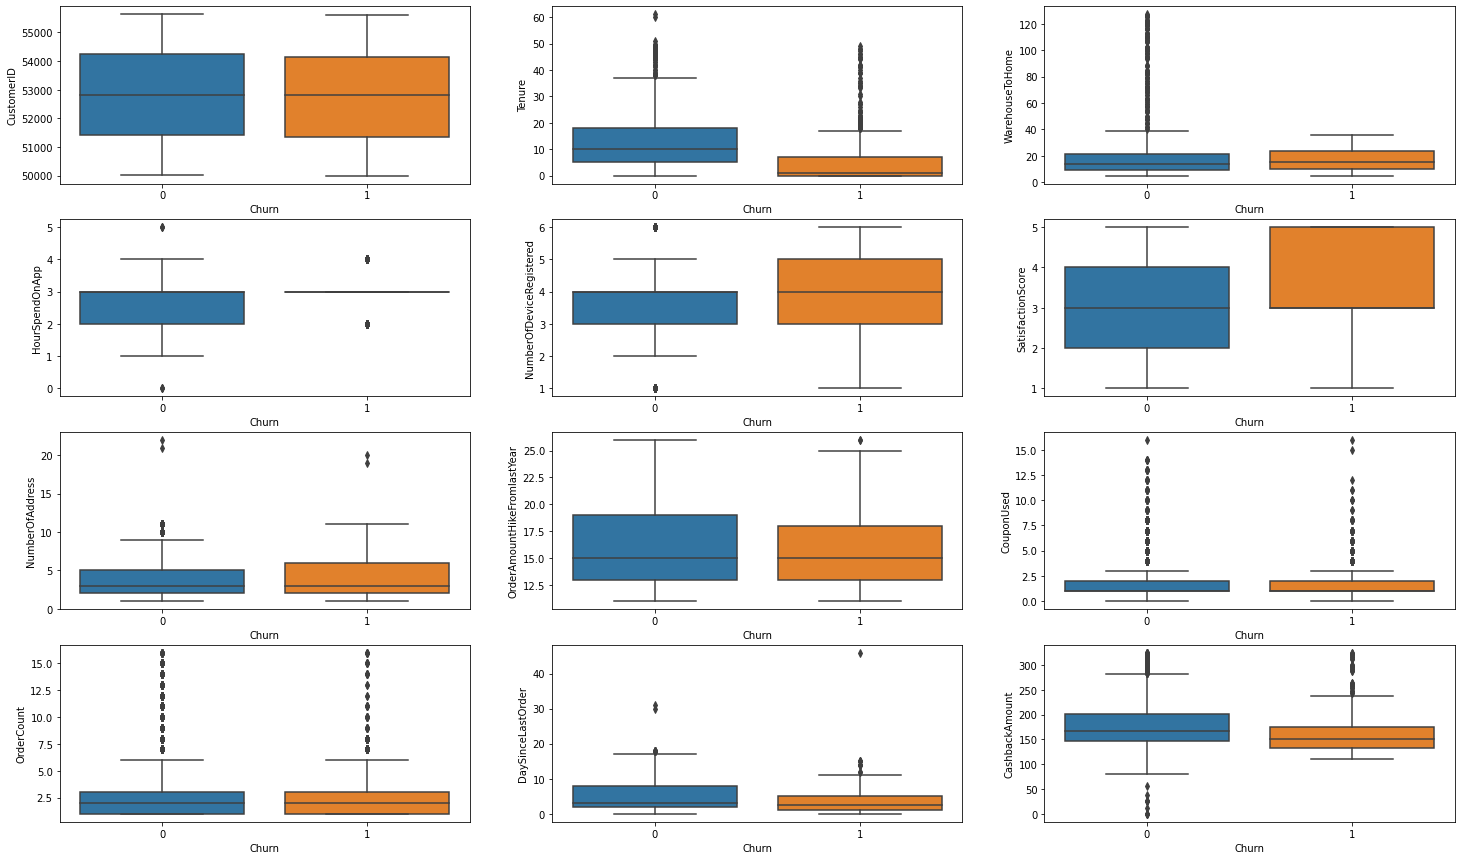

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis object
fig, ax = plt.subplots(4, 3, figsize=(25, 15))

# Define a list of features to plot
features = ['CustomerID','Tenure', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


for i, feature in enumerate(features):
    sns.boxplot(x="Churn", y=feature, data=dfn, ax=ax.flat[i])
    ax.flat[i].set_xlabel("Churn")
    ax.flat[i].set_ylabel(feature)

    
plt.show()

**Dealing with outliers in Tenure**

In [ ]:
dfc0 = dfn[dfn['Churn']==0]
dfc0

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50060,0,26.0,1,19.0,2.0,2,5,2,0,11.0,1.0,1.0,3.0,145
1,50069,0,47.0,1,13.0,2.0,2,2,5,0,14.0,0.0,2.0,2.0,121
2,50082,0,0.0,1,108.0,2.0,2,4,2,1,16.0,0.0,2.0,2.0,123
3,50143,0,0.0,1,11.0,2.0,2,5,2,0,12.0,1.0,1.0,5.0,140
4,50174,0,9.0,1,24.0,2.0,2,2,5,0,18.0,0.0,1.0,0.0,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55098,0,13.0,1,20.0,4.0,5,4,8,1,21.0,11.0,16.0,3.0,296
5626,55247,0,24.0,1,29.0,3.0,6,1,3,1,14.0,6.0,14.0,10.0,269
5627,55492,0,22.0,1,17.0,4.0,5,4,6,0,11.0,4.0,13.0,10.0,322
5628,51177,0,30.0,3,8.0,2.0,3,4,5,0,22.0,10.0,14.0,14.0,0


In [ ]:
Q1T= dfc0['Tenure'].quantile(0.25)
Q3T= dfc0['Tenure'].quantile(0.75)
IQRT = Q3T-Q1T
lowerr = Q1T-1.5*IQRT
upperr = Q3T+1.5*IQRT
for i, data in dfc0.iterrows():
  if data['Tenure'] <lowerr:
    dfc0.at[i,'Tenure'] = lowerr
  elif data['Tenure'] > upperr :
    dfc0.at[i,'Tenure'] = upperr
  else:
    dfc0.at[i,'Tenure'] = data['Tenure']



In [ ]:
dfc1 = dfn[dfn['Churn']==1]

In [ ]:
Q1= dfc1['Tenure'].quantile(0.25)
Q3= dfc1['Tenure'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
for i, data in dfc1.iterrows():
  if data['Tenure'] <lower:
    dfc1.at[i,'Tenure'] = lower
  elif data['Tenure'] > upper :
    dfc1.at[i,'Tenure'] = upper
  else:
    dfc1.at[i,'Tenure'] = data['Tenure']

In [ ]:
dff = pd.concat([dfc0,dfc1],axis =0)

<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

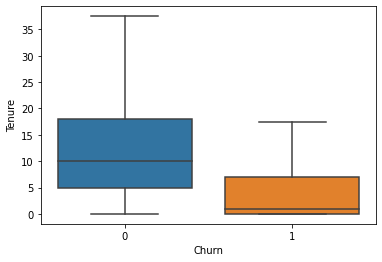

In [ ]:
sns.boxplot(x='Churn',y='Tenure',data= dff)

**Dealing with outliers in Warehousetohome**

In [ ]:
Q1T= dfc0['WarehouseToHome'].quantile(0.25)
Q3T= dfc0['WarehouseToHome'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['WarehouseToHome'] <lowerr:  
    dfc0.at[i,'WarehouseToHome'] = lowerr 
  elif data['WarehouseToHome'] > upperr : 
    dfc0.at[i,'WarehouseToHome'] = upperr   
  else: 
    dfc0.at[i,'WarehouseToHome'] = data['WarehouseToHome']

In [ ]:
dff= pd.concat([dfc0,dfc1], axis = 0)

<AxesSubplot:xlabel='Churn', ylabel='WarehouseToHome'>

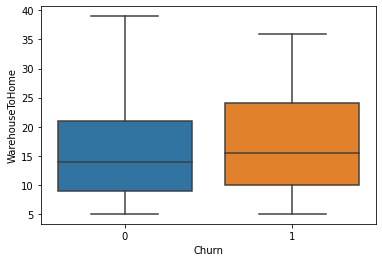

In [ ]:
sns.boxplot(x='Churn',y='WarehouseToHome',data= dff)

**Dealing with outliers in HourSpendOnApp**

In [ ]:
Q1T= dfc0['HourSpendOnApp'].quantile(0.25)
Q3T= dfc0['HourSpendOnApp'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['HourSpendOnApp'] <lowerr:  
    dfc0.at[i,'HourSpendOnApp'] = lowerr 
  elif data['HourSpendOnApp'] > upperr : 
    dfc0.at[i,'HourSpendOnApp'] = upperr   
  else: 
    dfc0.at[i,'HourSpendOnApp'] = data['HourSpendOnApp']

In [ ]:
Q1T= dfc1['HourSpendOnApp'].quantile(0.25)
Q3T= dfc1['HourSpendOnApp'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc1.iterrows(): 
  if data['HourSpendOnApp'] <lowerr:  
    dfc1.at[i,'HourSpendOnApp'] = lowerr 
  elif data['HourSpendOnApp'] > upperr : 
    dfcba1.at[i,'HourSpendOnApp'] = upperr   
  else: 
    dfc1.at[i,'HourSpendOnApp'] = data['HourSpendOnApp']

In [ ]:
dff = pd.concat([dfc0,dfc1], axis= 0)

<AxesSubplot:xlabel='Churn', ylabel='HourSpendOnApp'>

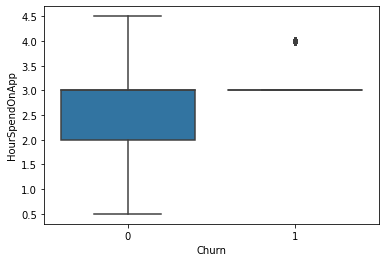

In [ ]:
sns.boxplot(x= 'Churn', y='HourSpendOnApp'  ,data = dff)

**Dealing With Outliers in NumberOfDeviceRegistered**

In NumberOfDeviceRegistered column, outlier is only present when Churn =0, so we will be only dealing with that.

In [ ]:
Q1T= dfc0['NumberOfDeviceRegistered'].quantile(0.25)
Q3T= dfc0['NumberOfDeviceRegistered'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['NumberOfDeviceRegistered'] <lowerr:  
    dfc0.at[i,'NumberOfDeviceRegistered'] = lowerr 
  elif data['NumberOfDeviceRegistered'] > upperr : 
    dfc0.at[i,'NumberOfDeviceRegistered'] = upperr   
  else: 
    dfc0.at[i,'NumberOfDeviceRegistered'] = data['NumberOfDeviceRegistered']

In [ ]:
dff = pd.concat([dfc0,dfc1], axis = 0)

<AxesSubplot:xlabel='Churn', ylabel='NumberOfDeviceRegistered'>

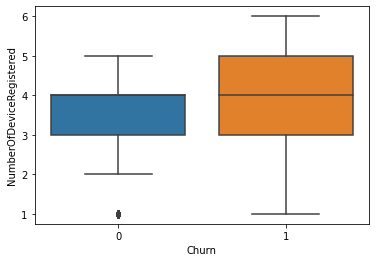

In [ ]:
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data = dff)

**Dealing with outliers in NumberOfAddress**

In [ ]:
Q1T= dfc0['NumberOfAddress'].quantile(0.25)
Q3T= dfc0['NumberOfAddress'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['NumberOfAddress'] <lowerr:  
    dfc0.at[i,'NumberOfAddress'] = lowerr 
  elif data['NumberOfAddress'] > upperr : 
    dfc0.at[i,'NumberOfAddress'] = upperr   
  else: 
    dfc0.at[i,'NumberOfAddress'] = data['NumberOfAddress']

In [ ]:
Q1T= dfc1['NumberOfAddress'].quantile(0.25)
Q3T= dfc1['NumberOfAddress'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc1.iterrows(): 
  if data['NumberOfAddress'] <lowerr:  
    dfc1.at[i,'NumberOfAddress'] = lowerr 
  elif data['NumberOfAddress'] > upperr : 
    dfc1.at[i,'NumberOfAddress'] = upperr   
  else: 
    dfc1.at[i,'NumberOfAddress'] = data['NumberOfAddress']

In [ ]:
dff = pd.concat([dfc0,dfc1], axis = 0)

<AxesSubplot:xlabel='Churn', ylabel='NumberOfAddress'>

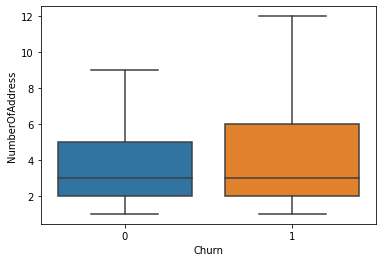

In [ ]:
sns.boxplot(x= 'Churn', y='NumberOfAddress'  ,data = dff)

In [ ]:
dff.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype=object)

**Dealing with outliers in OrderAmountHikeFromlastYear**

In [ ]:
Q1T= dfc0['OrderAmountHikeFromlastYear'].quantile(0.25)
Q3T= dfc0['OrderAmountHikeFromlastYear'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['OrderAmountHikeFromlastYear'] <lowerr:  
    dfc0.at[i,'OrderAmountHikeFromlastYear'] = lowerr 
  elif data['OrderAmountHikeFromlastYear'] > upperr : 
    dfc0.at[i,'OrderAmountHikeFromlastYear'] = upperr   
  else: 
    dfc0.at[i,'OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear']

In [ ]:
Q1T= dfc1['OrderAmountHikeFromlastYear'].quantile(0.25)
Q3T= dfc1['OrderAmountHikeFromlastYear'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc1.iterrows(): 
  if data['OrderAmountHikeFromlastYear'] <lowerr:  
    dfc1.at[i,'OrderAmountHikeFromlastYear'] = lowerr 
  elif data['OrderAmountHikeFromlastYear'] > upperr : 
    dfc1.at[i,'OrderAmountHikeFromlastYear'] = upperr   
  else: 
    dfc1.at[i,'OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear']

In [ ]:
dff= pd.concat([dfc0,dfc1], axis = 0)

<AxesSubplot:xlabel='Churn', ylabel='OrderAmountHikeFromlastYear'>

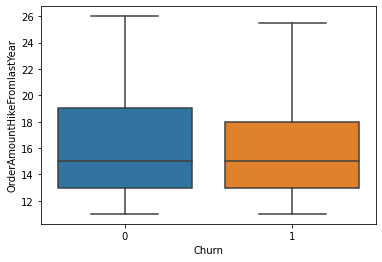

In [ ]:
sns.boxplot(x='Churn',y='OrderAmountHikeFromlastYear',data = dff)

**Dealing with outliers in CouponUsed**

In [ ]:
Q1T= dfc0['CouponUsed'].quantile(0.25)
Q3T= dfc0['CouponUsed'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['CouponUsed'] <lowerr:  
    dfc0.at[i,'CouponUsed'] = lowerr 
  elif data['CouponUsed'] > upperr : 
    dfc0.at[i,'CouponUsed'] = upperr   
  else: 
    dfc0.at[i,'CouponUsed'] = data['CouponUsed']

In [ ]:
Q1T= dfc1['CouponUsed'].quantile(0.25)
Q3T= dfc1['CouponUsed'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc1.iterrows(): 
  if data['CouponUsed'] <lowerr:  
    dfc1.at[i,'CouponUsed'] = lowerr 
  elif data['CouponUsed'] > upperr : 
    dfc1.at[i,'CouponUsed'] = upperr   
  else: 
    dfc1.at[i,'CouponUsed'] = data['CouponUsed']

In [ ]:
dff= pd.concat([dfc0,dfc1], axis = 0)

<AxesSubplot:xlabel='Churn', ylabel='CouponUsed'>

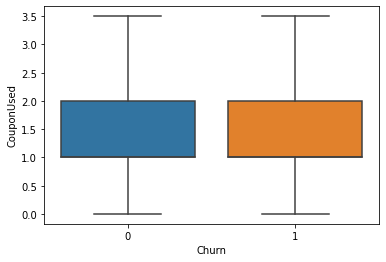

In [ ]:
sns.boxplot(x='Churn',y='CouponUsed',data = dff)

**Dealing with outliers in OrderCount**

In [ ]:
Q1T= dfc0['OrderCount'].quantile(0.25)
Q3T= dfc0['OrderCount'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['OrderCount'] <lowerr:  
    dfc0.at[i,'OrderCount'] = lowerr 
  elif data['OrderCount'] > upperr : 
    dfc0.at[i,'OrderCount'] = upperr   
  else: 
    dfc0.at[i,'OrderCount'] = data['OrderCount']

In [ ]:
Q1T= dfc1['OrderCount'].quantile(0.25)
Q3T= dfc1['OrderCount'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc1.iterrows(): 
  if data['OrderCount'] <lowerr:  
    dfc1.at[i,'OrderCount'] = lowerr 
  elif data['OrderCount'] > upperr : 
    dfc1.at[i,'OrderCount'] = upperr   
  else: 
    dfc1.at[i,'OrderCount'] = data['OrderCount']

In [ ]:
dff = pd.concat([dfc0,dfc1], axis = 0)

<AxesSubplot:xlabel='Churn', ylabel='OrderCount'>

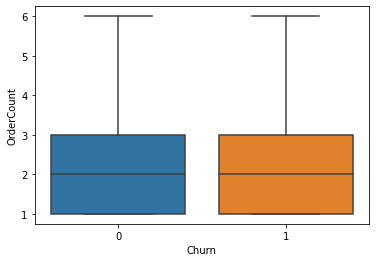

In [ ]:
sns.boxplot(x='Churn',y= 'OrderCount', data = dff)

**Dealing with Outliers in DaySinceLastOrder**

In [ ]:
Q1T= dfc0['DaySinceLastOrder'].quantile(0.25)
Q3T= dfc0['DaySinceLastOrder'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['DaySinceLastOrder'] <lowerr:  
    dfc0.at[i,'DaySinceLastOrder'] = lowerr 
  elif data['DaySinceLastOrder'] > upperr : 
    dfc0.at[i,'DaySinceLastOrder'] = upperr   
  else: 
    dfc0.at[i,'DaySinceLastOrder'] = data['DaySinceLastOrder']

In [ ]:
Q1T= dfc1['DaySinceLastOrder'].quantile(0.25)
Q3T= dfc1['DaySinceLastOrder'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc1.iterrows(): 
  if data['DaySinceLastOrder'] <lowerr:  
    dfc1.at[i,'DaySinceLastOrder'] = lowerr 
  elif data['DaySinceLastOrder'] > upperr : 
    dfc1.at[i,'DaySinceLastOrder'] = upperr   
  else: 
    dfc1.at[i,'DaySinceLastOrder'] = data['DaySinceLastOrder']

In [ ]:
dff = pd.concat([dfc0,dfc1], axis = 0)

<AxesSubplot:xlabel='Churn', ylabel='DaySinceLastOrder'>

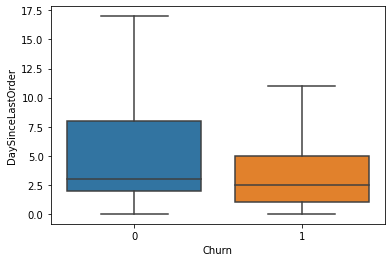

In [ ]:
sns.boxplot(x='Churn',y= 'DaySinceLastOrder', data = dff)

**Dealing with outliers in CashbackAmount**

In [ ]:
Q1T= dfc0['CashbackAmount'].quantile(0.25)
Q3T= dfc0['CashbackAmount'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc0.iterrows(): 
  if data['CashbackAmount'] <lowerr:  
    dfc0.at[i,'CashbackAmount'] = lowerr 
  elif data['CashbackAmount'] > upperr : 
    dfc0.at[i,'CashbackAmount'] = upperr   
  else: 
    dfc0.at[i,'CashbackAmount'] = data['CashbackAmount']

In [ ]:
Q1T= dfc1['CashbackAmount'].quantile(0.25)
Q3T= dfc1['CashbackAmount'].quantile(0.75) 
IQRT = Q3T-Q1T 
lowerr = Q1T-1.5*IQRT 
upperr = Q3T+1.5*IQRT 
for i, data in dfc1.iterrows(): 
  if data['CashbackAmount'] <lowerr:  
    dfc1.at[i,'CashbackAmount'] = lowerr 
  elif data['CashbackAmount'] > upperr : 
    dfc1.at[i,'CashbackAmount'] = upperr   
  else: 
    dfc1.at[i,'CashbackAmount'] = data['CashbackAmount']

In [ ]:
dff = pd.concat([dfc0,dfc1], axis = 0)

<AxesSubplot:xlabel='Churn', ylabel='CashbackAmount'>

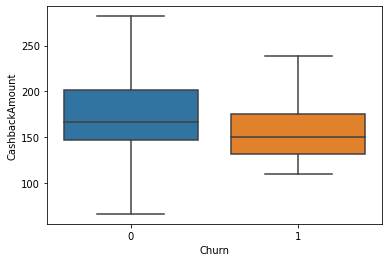

In [ ]:
sns.boxplot(x='Churn',y= 'CashbackAmount', data = dff)

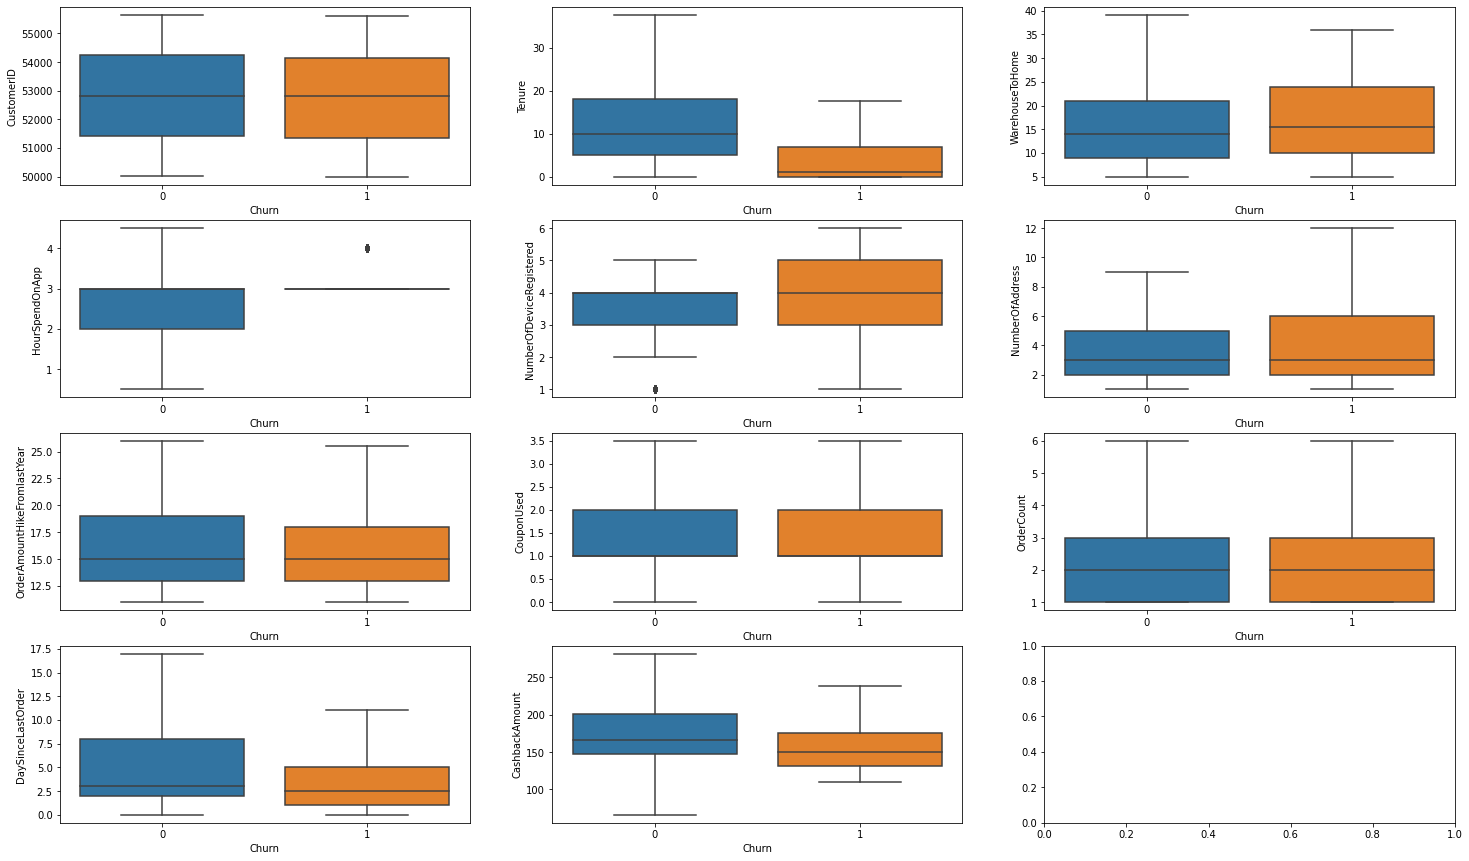

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(4, 3, figsize=(25, 15))

# Define a list of features to plot
features = ['CustomerID','Tenure', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


for i, feature in enumerate(features):
    sns.boxplot(x="Churn", y=feature, data=dff, ax=ax.flat[i])
    ax.flat[i].set_xlabel("Churn")
    ax.flat[i].set_ylabel(feature)

    
plt.show()

***Outliers has been succesfully replaced.***

**Preparing Data for Visualization**

In [ ]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'CategoricalCashbackAmount', 'CategoricalNDR',
       'CategoricalHrsOnApp', 'CategoricalOrderCt'], dtype=object)

In [ ]:
dropp= ['CategoricalCashbackAmount', 'CategoricalNDR',
       'CategoricalHrsOnApp', 'CategoricalOrderCt']

In [ ]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'CategoricalCashbackAmount', 'CategoricalNDR',
       'CategoricalHrsOnApp', 'CategoricalOrderCt'], dtype=object)

In [ ]:
df= df.drop(dropp, axis = 1)

In [ ]:
dff.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype=object)

In [ ]:
wclass = np.linspace(min(dff['WarehouseToHome']),max(dff['WarehouseToHome']),4)
wclass

array([ 5.        , 16.33333333, 27.66666667, 39.        ])

In [ ]:
wclass_names = ['5km - 16.33km','16.33km - 27.67km','27.67 - 39km'] 
dff['CategoricalWarehouseToHome'] = pd.cut(dff['WarehouseToHome'],wclass,labels = wclass_names,include_lowest= True)  
dff['CategoricalWarehouseToHome'].value_counts()

5km - 16.33km        3628
16.33km - 27.67km    1135
27.67 - 39km          867
Name: CategoricalWarehouseToHome, dtype: int64

In [ ]:
cclass = np.linspace(min(dff['CashbackAmount']),max(dff['CashbackAmount']),4) 
cclass

array([ 66., 138., 210., 282.])

In [ ]:
cclass_names = ['Rs 66 - Rs 138','Rs 138 - Rs 210','Rs 210 - Rs 282'] 
dff['CategoricalCashbackAmount'] = pd.cut(dff['CashbackAmount'],cclass,labels = cclass_names,include_lowest= True)  
dff['CategoricalCashbackAmount'].value_counts()

Rs 138 - Rs 210    3506
Rs 210 - Rs 282    1093
Rs 66 - Rs 138     1031
Name: CategoricalCashbackAmount, dtype: int64

In [ ]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

In [ ]:
dff.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'CategoricalWarehouseToHome', 'CategoricalCashbackAmount'],
      dtype=object)

In [ ]:
df_merged = df.merge(dff)
df_merged.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CategoricalWarehouseToHome,CategoricalCashbackAmount
0,50060,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,...,Married,2,0,11.0,1.0,1.0,3.0,145,16.33km - 27.67km,Rs 138 - Rs 210
1,50143,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,2,...,Married,2,0,12.0,1.0,1.0,5.0,140,5km - 16.33km,Rs 138 - Rs 210
2,50174,0,9.0,Computer,1,24.0,Debit Card,Male,2.0,2,...,Divorced,5,0,18.0,0.0,1.0,0.0,137,16.33km - 27.67km,Rs 66 - Rs 138
3,50237,0,8.0,Phone,1,16.0,Debit Card,Female,2.0,2,...,Divorced,4,1,13.0,0.0,1.0,7.0,122,5km - 16.33km,Rs 66 - Rs 138
4,50393,0,0.0,Phone,3,14.0,Debit Card,Male,2.0,2,...,Divorced,1,0,22.0,0.0,1.0,2.0,149,5km - 16.33km,Rs 138 - Rs 210


In [ ]:
df = df_merged.copy()
df.to_csv('ECOMMERCE_FINAL.csv')

We have now saved the Cleaned Data as 'ECOMMERCE_FINAL.csv'

**Visualization**

<AxesSubplot:xlabel='Churn', ylabel='count'>

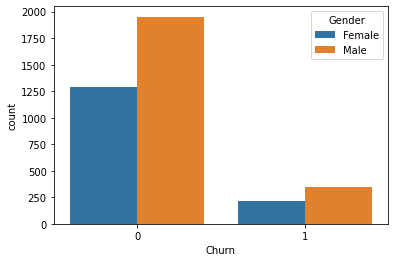

In [ ]:
import seaborn as sns
sns.countplot(x= 'Churn', hue='Gender' ,data = df)

When churn=0 and churn=1, the count of male is observed more than the female

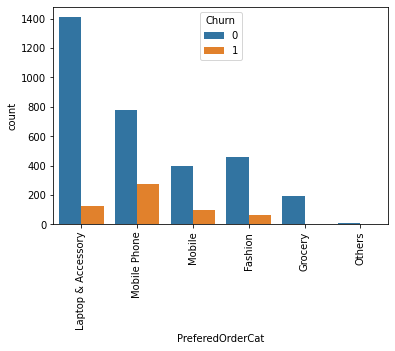

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'PreferedOrderCat', hue='Churn' ,data = df)
plt.xticks(rotation='vertical')
plt.show()

From the above figure we conclude that more number of customers who preferred to buy Laptop and Accessory continued to stay with the business, compared to others.

More number of customers who preferred to buy Mobile Phone tend to leave the business with respect to other order categories.

<AxesSubplot:xlabel='Churn', ylabel='count'>

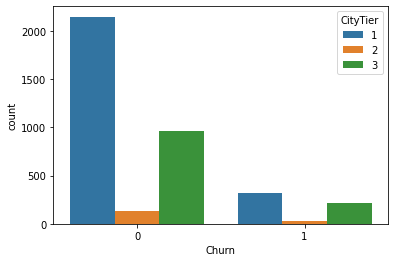

In [ ]:
import seaborn as sns
sns.countplot(x= 'Churn', hue='CityTier' ,data = df)

People from City Tier 1 continued to stay in the business followed by City Tier 3 and City Tier 2.

When we compared both the Churn 0 and 1, we can observe that the people from City Tier 1 has more count followed by City Tier 3 and City Tier 2.

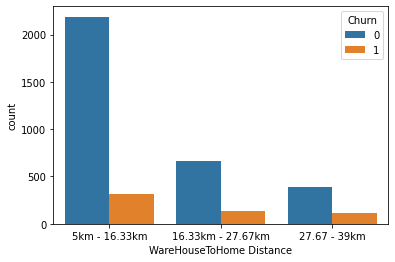

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'CategoricalWarehouseToHome', hue='Churn' ,data = df)
plt.xlabel("WareHouseToHome Distance")
plt.show()

From the above figure we can conclude that when the Ware House to Home Distance is between 5 - 16.33 km, the count of customers who left the business is more.

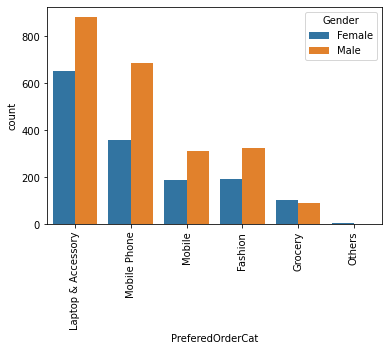

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'PreferedOrderCat', hue='Gender' ,data = df)
plt.xticks(rotation='vertical')
plt.show()

From the above figure we can conclude that among both Male and Female the preferred order category is Laptop nad Accessories followed by Mobile Phone.

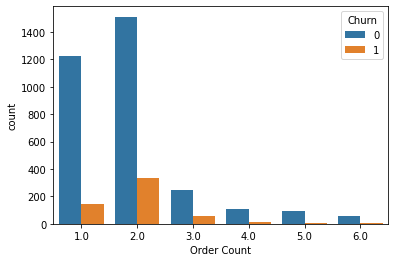

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'OrderCount', hue='Churn' ,data = df)
plt.xlabel("Order Count")
plt.show()

From the above figure we can conclude that when the Order count is 2, the count of Churn=0 and Churn=1 has been observed as more followed by when the Order count is 1.

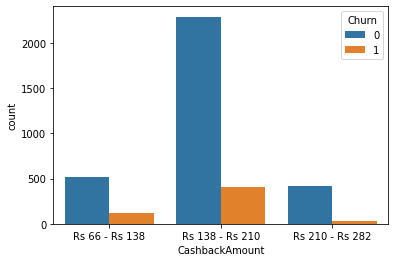

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'CategoricalCashbackAmount', hue='Churn' ,data = df)
plt.xlabel("CashbackAmount")
plt.show()

From the above figure we can conclude that when the Cashback Amount is between Rs. 138 - 210, the people choose to stay.

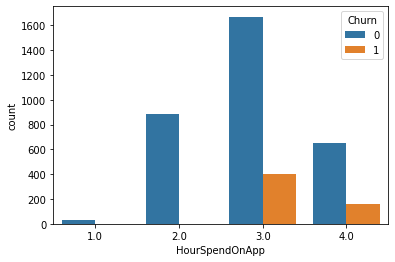

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'HourSpendOnApp', hue='Churn' ,data = df)
plt.xlabel("HourSpendOnApp")
plt.show()

From the above figure we conclude that customers spend mostly 3 hours of Time on the Ecommerce website.

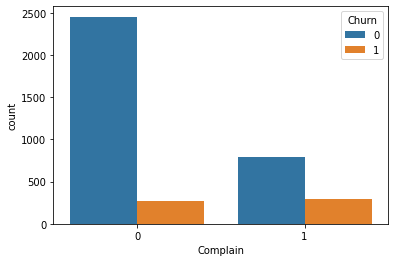

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'Complain', hue='Churn' ,data = df)
plt.xlabel("Complain")
plt.show()

From the above figure we can conclude that the count of customers who didn't complain is more when the churn=0 and the count of customers who complained is more when the churn=1. 



In [ ]:
tclass = np.linspace(min(df['Tenure']),max(df['Tenure']),4)  
tclass

array([ 0.        , 12.33333333, 24.66666667, 37.        ])

In [ ]:
tclass_names = ['0yrs - 12yrs','12yrs - 25yrs','25yrs - 38yrs'] 
df['CategoricalTenure'] = pd.cut(df['Tenure'],tclass,labels = tclass_names,include_lowest= True)  
df['CategoricalTenure'].value_counts()

0yrs - 12yrs     2630
12yrs - 25yrs     881
25yrs - 38yrs     290
Name: CategoricalTenure, dtype: int64

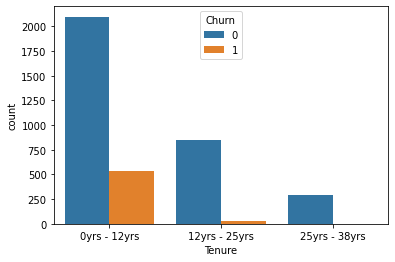

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'CategoricalTenure', hue='Churn' ,data = df)
plt.xlabel("Tenure")
plt.show()

From the above figure we can conclude that the number of years the customer who didn't continue to stay is between 0-12 years.

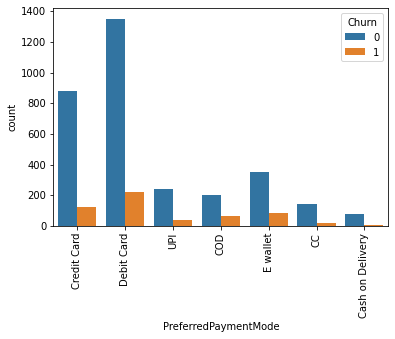

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'PreferredPaymentMode', hue='Churn' ,data = df)
plt.xlabel("PreferredPaymentMode")
plt.xticks(rotation = 'vertical')
plt.show()

From the above figure we can conclude that most of the customers who left the business where using Debit Card.

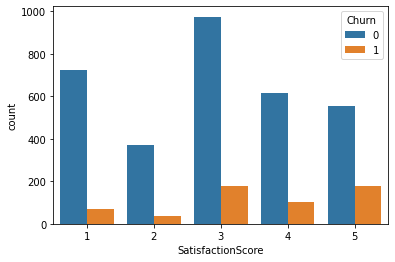

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'SatisfactionScore', hue='Churn' ,data = df)
plt.xlabel("SatisfactionScore")
plt.show()

From the above figure we can conclude that Satisfaction score is 3 for Churn=0. While for Churn=1, we observe the Satisfaction score is 3 and 5.

In [ ]:
df = df.drop(['CategoricalWarehouseToHome', 'CategoricalCashbackAmount'], axis=1)

# **D) Heatmap Correlation**

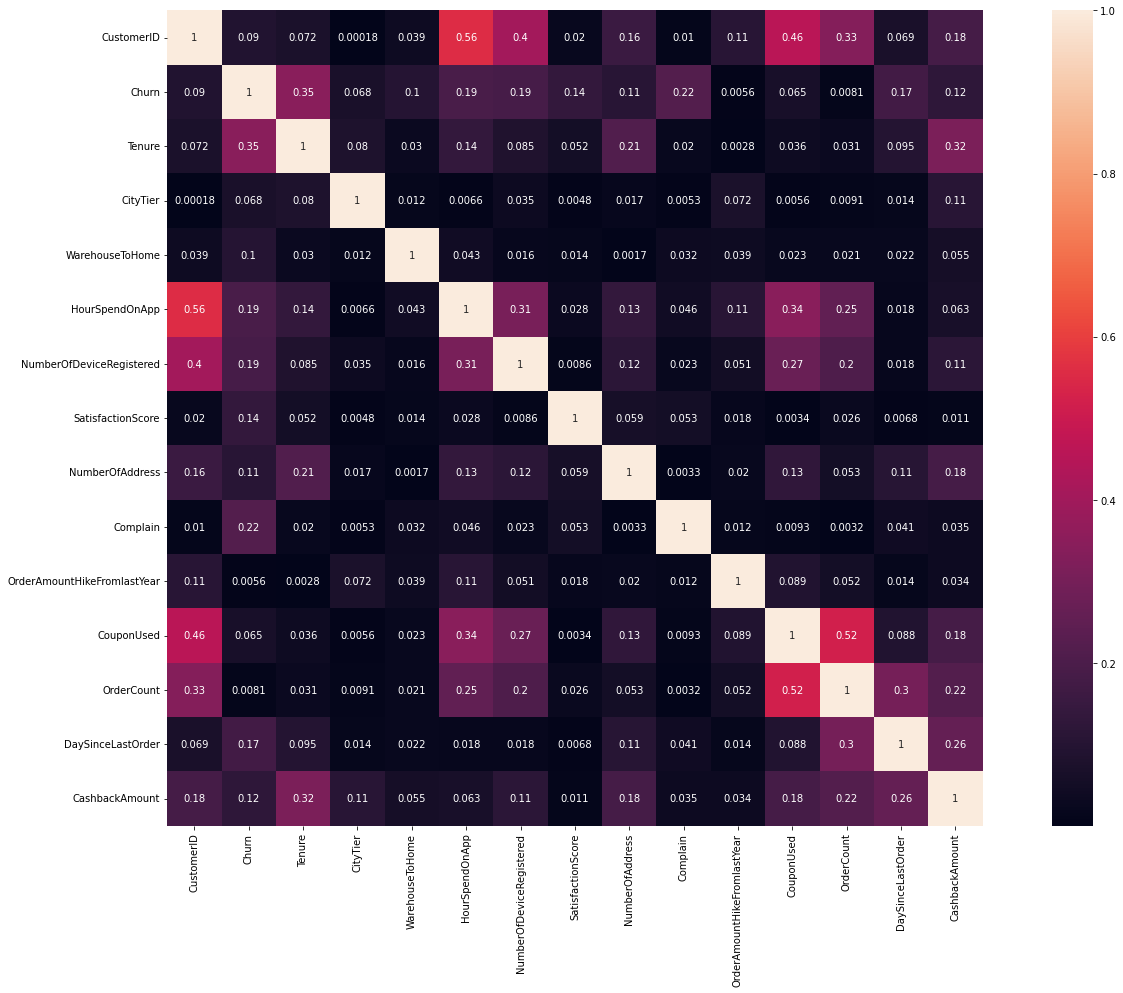

In [ ]:
plt.figure(figsize=(25, 15))
ax = sns.heatmap(df.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

Our target variable churn is highly correlated with Tenure compared to other Feature variables

# **E) Pairplot**

In [ ]:
sns.pairplot(data = df,hue='Churn',height=3)

We cannot conclude anything from the Pairplot

# **F) Feature Engineering**

In [ ]:
import pandas as pd
df = pd.read_csv("ECOMMERCE_FINAL.csv", header = 0)
df.columns.values

array(['Unnamed: 0', 'CustomerID', 'Churn', 'Tenure',
       'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'CategoricalWarehouseToHome', 'CategoricalCashbackAmount'],
      dtype=object)

In [ ]:
df = df.drop(['CategoricalWarehouseToHome', 'CategoricalCashbackAmount'], axis = 1)

We dropped CategoricalWareHouseToHome and CategoricalCashbackAmount because we do not require it for the Model Building.

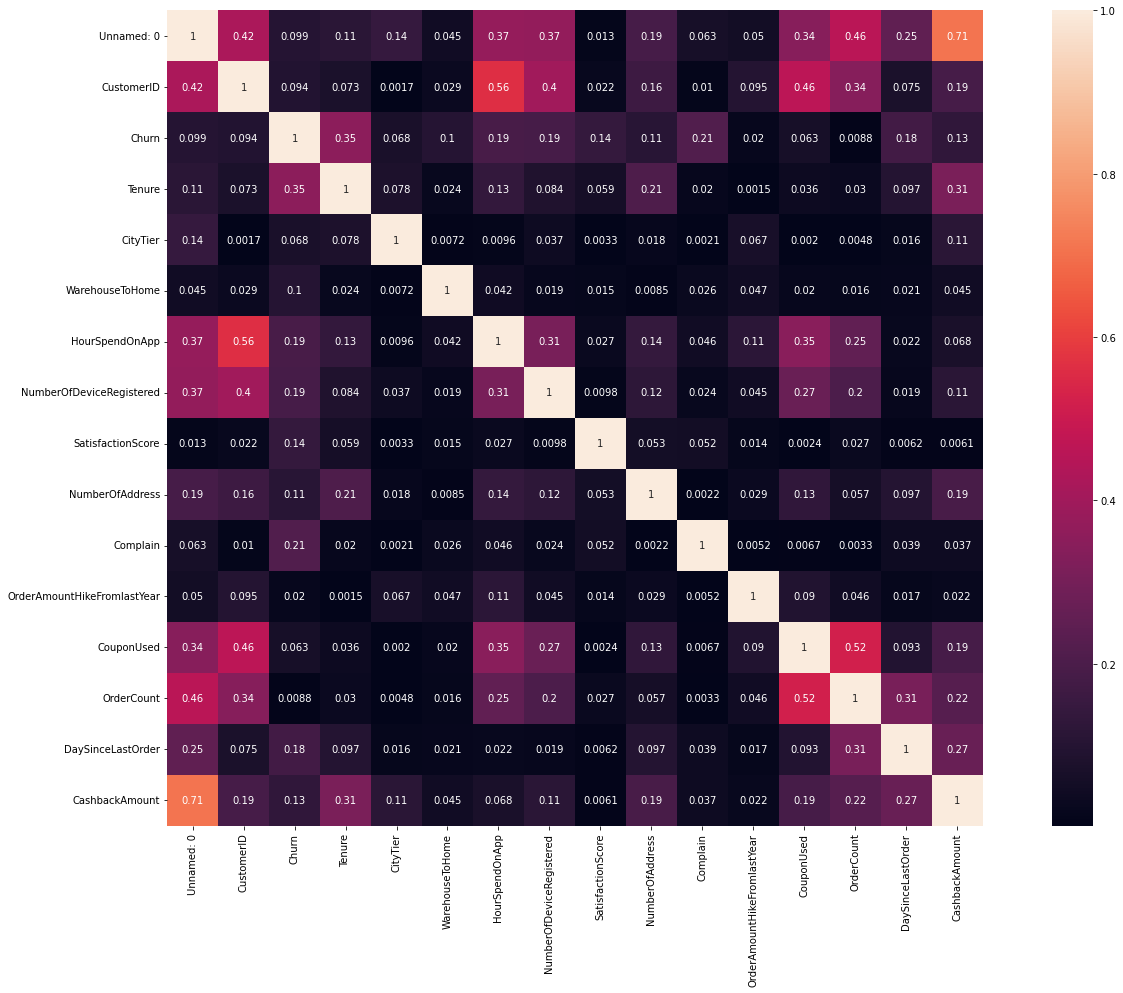

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 15))
ax = sns.heatmap(df.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

From the heatmap, we can clearly observe that there is high correlation between OrderCount and CouponUsed of about 0.52 also there is a moderate correlation between Tenure and CashBackAmount of abot 0.31. We will remove CouponUsed and CashbackAmount because of high correlation and remove multicollinearity, we also remove CustomerID, because it doesnt make any sense.

In [ ]:
df = df.drop('CouponUsed',axis=1)

In [ ]:
df = df.drop('CashbackAmount',axis=1)

In [ ]:
df.columns.values

array(['Unnamed: 0', 'CustomerID', 'Churn', 'Tenure',
       'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'OrderCount',
       'DaySinceLastOrder'], dtype=object)

In [ ]:
df = df.drop('CustomerID', axis=1)

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

10) CLEANED DATA

In [ ]:
df.to_csv('ECOMMERCE_FINAL2.csv')

# **7) CATEGORICAL AND NUMERICAL FEATURE**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        3801 non-null   int64  
 1   Tenure                       3801 non-null   float64
 2   PreferredLoginDevice         3801 non-null   object 
 3   CityTier                     3801 non-null   int64  
 4   WarehouseToHome              3801 non-null   float64
 5   PreferredPaymentMode         3801 non-null   object 
 6   Gender                       3801 non-null   object 
 7   HourSpendOnApp               3801 non-null   float64
 8   NumberOfDeviceRegistered     3801 non-null   int64  
 9   PreferedOrderCat             3801 non-null   object 
 10  SatisfactionScore            3801 non-null   int64  
 11  MaritalStatus                3801 non-null   object 
 12  NumberOfAddress              3801 non-null   int64  
 13  Complain          

**Categorical Features** - PreferredLoginDevice, PreferredPaymentMode, PreferedOrderCat, MaritalStatus

**Numerical Feature** - Churn, Tenure, CityTier, WarehouseToHome, Gender, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, OrderCount, DaySinceLastOrder 

# **9) LABEL ENCODING**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_imp = df.drop('Churn',axis =1)
y_imp = df['Churn']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in x_imp.columns:
  if x_imp[column_name].dtype == object:
    x_imp[column_name] = le.fit_transform(x_imp[column_name])
  else:
    pass


We are doing Label Encoding for those columns whose datatype is object(Categorical)

# **8) FEATURE IMPORTANCE AND ITS GRAPH**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_imp, y_imp, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=150,random_state=42,criterion='entropy')
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

In [ ]:
dataframe= pd.DataFrame({'Column_Names': x_imp.columns.values
            ,'Importance' : clf.feature_importances_ })


In [ ]:
dataframe

,Column_Names,Importance
0,Tenure,0.251082
1,PreferredLoginDevice,0.027758
2,CityTier,0.024678
3,WarehouseToHome,0.083962
4,PreferredPaymentMode,0.041791
5,Gender,0.017150
6,HourSpendOnApp,0.079601
7,NumberOfDeviceRegistered,0.058509
8,PreferedOrderCat,0.046382
9,SatisfactionScore,0.057862


In [ ]:
df_sorted_desc= dataframe.sort_values('Importance',ascending=False)

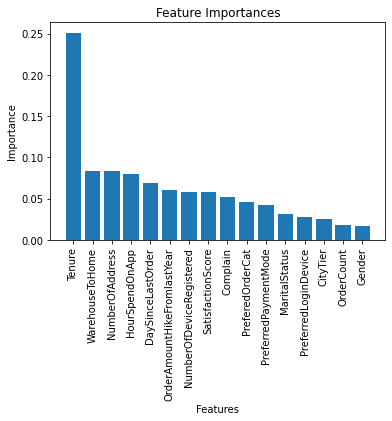

In [ ]:
plt.bar('Column_Names','Importance' , data = df_sorted_desc )
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

Tenure is the most important feature for predicting the churn, followed by WarehouseToHouse and NumberOfAddress.

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder
0,0,26.0,Phone,1,19.0,Credit Card,Female,2.0,2,Laptop & Accessory,5,Married,2,0,11.0,1.0,3.0
1,0,7.0,Computer,1,13.0,CC,Male,2.0,2,Mobile,2,Married,5,0,14.0,2.0,2.0
2,0,0.0,Phone,1,23.0,Debit Card,Male,2.0,2,Mobile,4,Married,2,1,16.0,2.0,2.0
3,0,0.0,Computer,1,11.0,Debit Card,Male,2.0,2,Laptop & Accessory,5,Married,2,0,12.0,1.0,5.0
4,0,9.0,Computer,1,24.0,Debit Card,Male,2.0,2,Mobile Phone,2,Divorced,5,0,18.0,1.0,0.0


# **11)Normalization - Feature Scaling**

In [ ]:
df['Churn'] = df['Churn'].astype('object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
colnames = df.columns
num_columns = df.select_dtypes(include=['float', 'int']).columns
df[num_columns] = sc.fit_transform(df[num_columns])

In [ ]:
df_new = pd.DataFrame(data=df, columns=colnames)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        3801 non-null   object 
 1   Tenure                       3801 non-null   float64
 2   PreferredLoginDevice         3801 non-null   object 
 3   CityTier                     3801 non-null   float64
 4   WarehouseToHome              3801 non-null   float64
 5   PreferredPaymentMode         3801 non-null   object 
 6   Gender                       3801 non-null   object 
 7   HourSpendOnApp               3801 non-null   float64
 8   NumberOfDeviceRegistered     3801 non-null   float64
 9   PreferedOrderCat             3801 non-null   object 
 10  SatisfactionScore            3801 non-null   float64
 11  MaritalStatus                3801 non-null   object 
 12  NumberOfAddress              3801 non-null   float64
 13  Complain          

In [ ]:
for i in df_new.columns:
  if(df_new[i].dtypes == 'object'):
    print(i)
    print(df_new[i].nunique())

Churn
2
PreferredLoginDevice
3
PreferredPaymentMode
7
Gender
2
PreferedOrderCat
6
MaritalStatus
3


In [ ]:
df_new['Gender'] = le.fit_transform(df_new['Gender'])
df_new['Churn'] = le.fit_transform(df_new['Churn'])

In [ ]:
df_new = pd.get_dummies(df_new)
df_new.columns.values

array(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'OrderCount', 'DaySinceLastOrder', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'], dtype=object)

In [ ]:
df_new.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1.950990,-0.720608,0.390720,0,-1.391919,-1.640403,1.419736,-0.863292,-0.626752,...,0,0,0,1,0,0,0,0,1,0
1,0,-0.298995,-0.720608,-0.331443,1,-1.391919,-1.640403,-0.762398,0.473679,-0.626752,...,0,0,0,0,1,0,0,0,1,0
2,0,-1.127936,-0.720608,0.872162,1,-1.391919,-1.640403,0.692358,-0.863292,1.595528,...,0,0,0,0,1,0,0,0,1,0
3,0,-1.127936,-0.720608,-0.572164,1,-1.391919,-1.640403,1.419736,-0.863292,-0.626752,...,0,0,0,1,0,0,0,0,1,0
4,0,-0.062154,-0.720608,0.992523,1,-1.391919,-1.640403,-0.762398,0.473679,-0.626752,...,0,0,0,0,0,1,0,1,0,0


# **DATA SPLIT(TRAIN 70% TEST 30%)**

In [ ]:
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']

In [ ]:
X.head()

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.950990,-0.720608,0.390720,0,-1.391919,-1.640403,1.419736,-0.863292,-0.626752,-1.327034,...,0,0,0,1,0,0,0,0,1,0
1,-0.298995,-0.720608,-0.331443,1,-1.391919,-1.640403,-0.762398,0.473679,-0.626752,-0.474565,...,0,0,0,0,1,0,0,0,1,0
2,-1.127936,-0.720608,0.872162,1,-1.391919,-1.640403,0.692358,-0.863292,1.595528,0.093747,...,0,0,0,0,1,0,0,0,1,0
3,-1.127936,-0.720608,-0.572164,1,-1.391919,-1.640403,1.419736,-0.863292,-0.626752,-1.042878,...,0,0,0,1,0,0,0,0,1,0
4,-0.062154,-0.720608,0.992523,1,-1.391919,-1.640403,-0.762398,0.473679,-0.626752,0.662059,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 102)

In [ ]:
df['Churn'].value_counts()

0    3246
1     555
Name: Churn, dtype: int64

In [ ]:
print("Number of Churn in X_train dataset ",X_train.shape)
print("Number of Churn in X_test dataset ",X_test.shape)
print("Number of Churn in y_train dataset ",y_train.shape)
print("Number of Churn in y_test dataset ",y_test.shape)

Number of Churn in X_train dataset  (2660, 31)
Number of Churn in X_test dataset  (1141, 31)
Number of Churn in y_train dataset  (2660,)
Number of Churn in y_test dataset  (1141,)


# **DEALING WITH IMBALANCED DATASET**

# **SMOTE**

In [ ]:
!pip3 install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state= 23)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
print("Before OverSampling, count of label 1 ", sum(y_train==1))
print("Before OverSampling, count of label 0 ", sum(y_train==0))
print("After OverSampling, count of label 1 ", sum(y_train_res==1))
print("After OverSampling, count of label 0 ", sum(y_train_res==0))

Before OverSampling, count of label 1  404
Before OverSampling, count of label 0  2256
After OverSampling, count of label 1  2256
After OverSampling, count of label 0  2256


# **13) APPLYING 3 ML ALGORITHM**


1. LOGISTIC REGRESSION
2. DECISION TREE
3. RANDOM FOREST CLASSIFIER

# **15) TESTING THE MODEL**
# **16) Confusion matrix with importance of accuracy/recall/precission/F1 score**




# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_res,y_train_res.ravel())
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",cm)
print('------------------------------------')
print("Classification report is \n ", classification_report(y_test,y_pred))

Confusion Matrix : 
 [[928  62]
 [ 41 110]]
------------------------------------
Classification report is 
                precision    recall  f1-score   support

           0       0.96      0.94      0.95       990
           1       0.64      0.73      0.68       151

    accuracy                           0.91      1141
   macro avg       0.80      0.83      0.81      1141
weighted avg       0.92      0.91      0.91      1141



**Accuracy** for Logistic Regression is about 91% before tuning.

**Confusion Matrix inference**

A count of 62 customers continued to stay with the business but the model predicted it incorrectly (i.e they left the business).
A count of 41 customers left the business but the model predicted it incorrectly (i.e they dint left the business).


**For Churn = 0 :**

**Precision** is about 96%, this means 96% of churn = 0 is correctly predicted by the model out of the total prediction for churn = 0 by the model. 
**Recall** is about 94%, which means 94% of churn = 0 has been correctly predicted by the model out of the total churn = 0.
**F1- score** is the harmonic mean of recall and precision, therefore it is 95%.

**For Churn = 1 :**

**Precision** is about 64%, this means 64% of churn = 1 is correctly predicted by the model out of the total prediction for churn = 1 by the model. 
**Recall** is about 73%, which means 94% of churn = 1 has been correctly predicted by the model out of the total churn = 1 .
**F1- score** is the harmonic mean of recall and precision, therefore it is 68%.

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt_model = DecisionTreeClassifier(random_state = 101)
dt_model.fit(X_train_res,y_train_res.ravel())
dt_pred_test = dt_model.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_pred_test)
print("confusion matrix:\n",dt_conf_matrix)
print("-------------------------------------")
print("classification report:\n",classification_report(y_test,dt_pred_test))

confusion matrix:
 [[952  38]
 [ 31 120]]
-------------------------------------
classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       990
           1       0.76      0.79      0.78       151

    accuracy                           0.94      1141
   macro avg       0.86      0.88      0.87      1141
weighted avg       0.94      0.94      0.94      1141



**Accuracy** for DeCision tree is about 94% before tuning.

**Confusion Matrix inference**

A count of 38 customers continued to stay with the business but the model predicted it incorrectly (i.e they left the business).
A count of 31 customers left the business but the model predicted it incorrectly (i.e they dint left the business).


**For Churn = 0 :**

**Precision** is about 97%, this means 97% of churn = 0 is correctly predicted by the model out of the total prediction for churn = 0 by the model. 
**Recall** is about 96%, which means 96% of churn = 0 has been correctly predicted by the model out of the total churn = 0.
**F1- score** is the harmonic mean of recall and precision, therefore it is 97%.

**For Churn = 1 :**

**Precision** is about 76%, this means 76% of churn = 1 is correctly predicted by the model out of the total prediction for churn = 1 by the model. 
**Recall** is about 79%, which means 79% of churn = 1 has been correctly predicted by the model out of the total churn = 1 .
**F1- score** is the harmonic mean of recall and precision, therefore it is 78%.

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
rf_model = RandomForestClassifier(random_state = 101)
rf_model.fit(X_train_res,y_train_res.ravel())
rf_pred_test = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_pred_test)
print("confusion matrix:\n",rf_conf_matrix)
print("-------------------------------------")
print("classification report:\n",classification_report(y_test,rf_pred_test))

confusion matrix:
 [[982   8]
 [ 28 123]]
-------------------------------------
classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       990
           1       0.94      0.81      0.87       151

    accuracy                           0.97      1141
   macro avg       0.96      0.90      0.93      1141
weighted avg       0.97      0.97      0.97      1141



*Accuracy** for Random Forest Classifier is about 97% before tuning.

**Confusion Matrix inference**

A count of 8 customers continued to stay with the business but the model predicted it incorrectly (i.e they left the business).
A count of 28 customers left the business but the model predicted it incorrectly (i.e they dint left the business).


**For Churn = 0 :**

**Precision** is about 97%, this means 97% of churn = 0 is correctly predicted by the model out of the total prediction for churn = 0 by the model. 
**Recall** is about 99%, which means 99% of churn = 0 has been correctly predicted by the model out of the total churn = 0.
**F1- score** is the harmonic mean of recall and precision, therefore it is 98%.

**For Churn = 1 :**

**Precision** is about 94%, this means 94% of churn = 1 is correctly predicted by the model out of the total prediction for churn = 1 by the model. 
**Recall** is about 81%, which means 81% of churn = 1 has been correctly predicted by the model out of the total churn = 1 .
**F1- score** is the harmonic mean of recall and precision, therefore it is 87%.

In [ ]:
# before tuning
lr = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state = 101)
rf_model = RandomForestClassifier(random_state = 101)


In [ ]:
clfs = {
    'Logistic Regression': lr,
    'Decision Tree' : dt_model,
    'Random Forest' : rf_model,
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, X_train, y_train,X_test, y_test):
    clf.fit(X_train_res,y_train_res.ravel())
    y_predict= clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    return accuracy,precision    

In [ ]:
accuracyy_score= []
precisionn_score= []

for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf,X_train, y_train,X_test, y_test)
    accuracyy_score.append(accuracy)
    precisionn_score.append(precision)  

In [ ]:
bt_performance_df= pd.DataFrame({'Algorithms': clfs.keys(),'Accuracy':accuracyy_score,'Precision':precisionn_score }).sort_values('Precision',ascending = False)
bt_performance_df

,Algorithms,Accuracy,Precision
2,Random Forest,0.968449,0.938931
1,Decision Tree,0.939527,0.759494
0,Logistic Regression,0.909728,0.639535


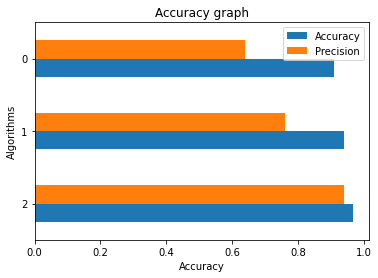

In [ ]:
import matplotlib.pyplot as plt

bt_performance_df.plot.barh()

plt.title('Accuracy graph')
plt.ylabel('Algorithms')
plt.xlabel('Accuracy')
plt.show()

**Random Forest Classifier seems to be the best model before tuning because of it's high level of accuracy and precision.**

# **14) Training with CV**

# **18) Fine Tuning with additional parameters**

# **LOGISTIC REGRESSION**

In [ ]:
logModel = LogisticRegression()

In [ ]:
import numpy as np
param_grid = [
    {'penalty' : ['l1','l2','elasticne','none'],
     'C': np.logspace(-4,4,50),
     'solver': ['lbfgs','newton-cg','liblinear','sag','saga']}]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel,param_grid = param_grid,cv=3,verbose=True,n_jobs=-1)

In [ ]:
clf.fit(X,y)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1350 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2', 'elasticne', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [ ]:
clf.best_params_

{'C': 0.12648552168552957, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr = LogisticRegression(C=0.12648552168552957,penalty = 'l1',solver = 'liblinear')
lr.fit(X_train_res,y_train_res.ravel())
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",cm)
print('------------------------------------')
print("Classification report is \n ", classification_report(y_test,y_pred))

Confusion Matrix : 
 [[916  74]
 [ 33 118]]
------------------------------------
Classification report is 
                precision    recall  f1-score   support

           0       0.97      0.93      0.94       990
           1       0.61      0.78      0.69       151

    accuracy                           0.91      1141
   macro avg       0.79      0.85      0.82      1141
weighted avg       0.92      0.91      0.91      1141



**Accuracy** for Logistic Regression is about 91% after tuning.

**Confusion Matrix inference**

A count of 74 customers continued to stay with the business but the model predicted it incorrectly (i.e they left the business).
A count of 33 customers left the business but the model predicted it incorrectly (i.e they dint left the business).


**For Churn = 0 :**

**Precision** is about 97%, this means 97% of churn = 0 is correctly predicted by the model out of the total prediction for churn = 0 by the model. 
**Recall** is about 93%, which means 93% of churn = 0 has been correctly predicted by the model out of the total churn = 0.
**F1- score** is the harmonic mean of recall and precision, therefore it is 94%.

**For Churn = 1 :**

**Precision** is about 61%, this means 61% of churn = 1 is correctly predicted by the model out of the total prediction for churn = 1 by the model. 
**Recall** is about 78%, which means 78% of churn = 1 has been correctly predicted by the model out of the total churn = 1 .
**F1- score** is the harmonic mean of recall and precision, therefore it is 69%.

# **DECISION TREE**

In [ ]:
# Hyperparameter Tuning the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 101)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}


In [ ]:
params = {"max_depth":[10,30,50,70,90,100],
    "criterion" : ['gini','entropy'],
    "max_depth" : [3,5,7,9,10],
    "min_samples_split" : [2,4,6]
}


In [ ]:
# CV stands for cross validation
from sklearn.model_selection import RandomizedSearchCV
rsearch = RandomizedSearchCV(dt_model,param_distributions=params,cv=5,verbose=True)
rsearch

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    min_samples_split=6),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, 10],
                                        'min_samples_split': [2, 4, 6]},
                   verbose=True)

In [ ]:
rsearch.fit(X_train_res,y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    min_samples_split=6),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, 10],
                                        'min_samples_split': [2, 4, 6]},
                   verbose=True)

In [ ]:
rsearch.best_params_

{'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}

In [ ]:
dt_model = DecisionTreeClassifier(min_samples_split=2,max_depth= 10,criterion='entropy')
dt_model.fit(X_train_res,y_train_res.ravel())
dt_pred_test = dt_model.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_pred_test)
print("confusion matrix:\n",dt_conf_matrix)
print("-------------------------------------")
print("classification report:\n",classification_report(y_test,dt_pred_test))

confusion matrix:
 [[950  40]
 [ 30 121]]
-------------------------------------
classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       990
           1       0.75      0.80      0.78       151

    accuracy                           0.94      1141
   macro avg       0.86      0.88      0.87      1141
weighted avg       0.94      0.94      0.94      1141



**Accuracy** for Decision Tree Classifier is about 94% after tuning.

**Confusion Matrix inference**

A count of 40 customers continued to stay with the business but the model predicted it incorrectly (i.e they left the business).
A count of 30 customers left the business but the model predicted it incorrectly (i.e they dint left the business).


**For Churn = 0 :**

**Precision** is about 97%, this means 97% of churn = 0 is correctly predicted by the model out of the total prediction for churn = 0 by the model. 
**Recall** is about 96%, which means 96% of churn = 0 has been correctly predicted by the model out of the total churn = 0.
**F1- score** is the harmonic mean of recall and precision, therefore it is 96%.

**For Churn = 1 :**

**Precision** is about 75%, this means 75% of churn = 1 is correctly predicted by the model out of the total prediction for churn = 1 by the model. 
**Recall** is about 80%, which means 80% of churn = 1 has been correctly predicted by the model out of the total churn = 1 .
**F1- score** is the harmonic mean of recall and precision, therefore it is 78%.

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 101)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_samples=None,max_features='auto',max_depth=None,criterion='gini',bootstrap=True)
rf_model.fit(X_train_res,y_train_res.ravel())
rf_pred_test = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_pred_test)
print("confusion matrix:\n",rf_conf_matrix)
print("-------------------------------------")
print("classification report:\n",classification_report(y_test,rf_pred_test))

confusion matrix:
 [[985   5]
 [ 23 128]]
-------------------------------------
classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       990
           1       0.96      0.85      0.90       151

    accuracy                           0.98      1141
   macro avg       0.97      0.92      0.94      1141
weighted avg       0.98      0.98      0.97      1141



**Accuracy** for Random Forest Classifier is about 98% after tuning.

**Confusion Matrix inference**

A count of 5 customers continued to stay with the business but the model predicted it incorrectly (i.e they left the business).
A count of 23 customers left the business but the model predicted it incorrectly (i.e they dint left the business).


**For Churn = 0 :**

**Precision** is about 98%, this means 98% of churn = 0 is correctly predicted by the model out of the total prediction for churn = 0 by the model. 
**Recall** is about 99%, which means 99% of churn = 0 has been correctly predicted by the model out of the total churn = 0.
**F1- score** is the harmonic mean of recall and precision, therefore it is 99%.

**For Churn = 1 :**

**Precision** is about 96%, this means 96% of churn = 1 is correctly predicted by the model out of the total prediction for churn = 1 by the model. 
**Recall** is about 85%, which means 85% of churn = 1 has been correctly predicted by the model out of the total churn = 1 .
**F1- score** is the harmonic mean of recall and precision, therefore it is 90%.

In [ ]:
# after tuning
lr = LogisticRegression(C=0.12648552168552957,penalty = 'l1',solver = 'liblinear')
dt_model = DecisionTreeClassifier(min_samples_split=2,max_depth= 10,criterion='gini',random_state = 101)
rf_model = RandomForestClassifier(n_estimators=50,min_samples_split=3,min_samples_leaf=2,max_samples=1.0,max_features=1.0,max_depth=7,criterion='gini',bootstrap=True)


In [ ]:
clfs = {
    'Logistic Regression': lr,
    'Decision Tree' : dt_model,
    'Random Forest' : rf_model,
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, X_train, y_train,X_test, y_test):
    clf.fit(X_train_res,y_train_res.ravel())
    y_predict= clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    return accuracy,precision    

In [ ]:
accuracyy_score= []
precisionn_score= []

for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf,X_train, y_train,X_test, y_test)
    accuracyy_score.append(accuracy)
    precisionn_score.append(precision)  

In [ ]:
at_performance_df= pd.DataFrame({'Algorithms': clfs.keys(),'Accuracy':accuracyy_score,'Precision':precisionn_score }).sort_values('Precision',ascending = False)
at_performance_df

,Algorithms,Accuracy,Precision
2,Random Forest,0.976337,0.955882
1,Decision Tree,0.936021,0.740741
0,Logistic Regression,0.906223,0.614583


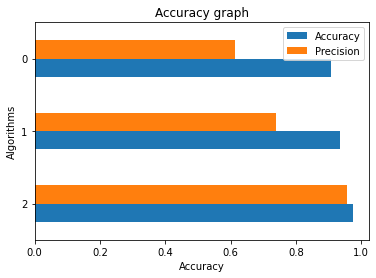

In [ ]:
import matplotlib.pyplot as plt

at_performance_df.plot.barh()

plt.title('Accuracy graph')
plt.ylabel('Algorithms')
plt.xlabel('Accuracy')
plt.show()

# **19) ML INSIGHTS**

**a) What conclusion one can make :** Random Forest Classifier continued to stay as the best model even before and after fine tuning with an accuracy of 98% and 96% precision.

**b) compared with different ML models** with the above graph.

**c) Advantages of Random Forest**

1) It can perform both regression and classification tasks.

2) A random forest produces good predictions that can be understood easily.

3) It can handle large datasets efficiently.

4) The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.

# **20) No difficulties has been faced in the project**